##### <b>Table of Contents</b> ######

1. Data Exploration/Cleaning
    - Basic Data Exploration & Data sanity check
    - Raw Data EDA
        - Univariate
        - Multivariate analysis
    - Data Cleaning (Overfitting, VIF-multicolinearity)
    - Feature Engineering + OHE
    - Clean EDA
        - Univariate
        - Multivariate analysis

2. Training Models
    - Models:
        - GBT, RT, Logistic Regression, Naive Bayes, KNeighbours classifier - (train 10 models use the top 3 models to do feature importance and selection)
    - Hyper Parameter Tuning (Compete against top 3-5 models)
        - Use Random Tree
    - Metrics
        - Confusion Matrix, Classification Report, AUC-ROC
    - Hyperparameter Tuning
    - Perform metric evaluation again

##### <b>Dictionary Code</b> ######

In [1]:
import pandas as pd

data = {
    "Feature": [
        "object_ID",
        "alpha",
        "delta",
        "UV_filter",
        "green_filter",
        "red_filter",
        "near_IR_filter",
        "IR_filter",
        "run_ID",
        "rereun_ID",
        "cam_col",
        "field_ID",
        "spec_obj_ID",
        "red_shift",
        "plate_ID",
        "MJD",
        "fiber_ID",
        "class"
    ],
    "Description": [
        "Object Identifier is the unique value that identifies the object in the image catalog used by SDSS.",
        "Right Ascension angle (at J2000 epoch).",
        "Declination angle (at J2000 epoch).",
        "Ultraviolet filter in the photometric system.",
        "Green filter in the photometric system.",
        "Red filter in the photometric system.",
        "Near Infrared filter in the photometric system.",
        "Infrared filter in the photometric system.",
        "Run Number used to identify the specific scan. Each run typically covers a specific area of the sky.",
        "Rerun Number to specify how the image was processed.",
        "Camera column to identify the scanline within the run.",
        "Field number to identify each field.",
        "Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class).",
        "Redshift value based on the increase in wavelength.",
        "Plate ID, identifies each plate in SDSS.",
        "Modified Julian Date, used to indicate when a given piece of SDSS data was taken.",
        "Fiber ID that identifies the fiber that pointed the light at the focal plane in each observation.",
        "Object class (galaxy, star, or quasar object)."
    ]
}

##### <b>Data Dictionary</b> ######

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 2000)  
dictionary = pd.DataFrame(data)
display(dictionary)

,Feature,Description
0,object_ID,Object Identifier is the unique value that identifies the object in the image catalog used by SDSS.
1,alpha,Right Ascension angle (at J2000 epoch).
2,delta,Declination angle (at J2000 epoch).
3,UV_filter,Ultraviolet filter in the photometric system.
4,green_filter,Green filter in the photometric system.
5,red_filter,Red filter in the photometric system.
6,near_IR_filter,Near Infrared filter in the photometric system.
7,IR_filter,Infrared filter in the photometric system.
8,run_ID,Run Number used to identify the specific scan. Each run typically covers a specific area of the sky.
9,rereun_ID,Rerun Number to specify how the image was processed.


#### Specifications #### 

1. Data Exploration and Pre-processing of data (20%)
- You are required to submit your codes to perform the tasks of data exploration and/or preprocessing of data. If you have taken any further steps such as __feature-selection or feature engineering__ here, you are to include them as well.
2. Model building and evaluation of model (20%)
- You are required to show the steps that you have taken to train and assess the models. If you
have taken any further steps to build your models such as by __setting hyper-parameters__, you are
to include them as well.
You are allowed to use __any models from the Scikit-learn library__, except for *Neural Network*
models. Do NOT use any other libraries for model implementation.
3. Deployment of model as a web application using Streamlit (10%)
- After you have implemented your models, you are then required to choose a model and then
deploy it as a web application.
Since it is a web application, you are encouraged to do up a nice and presentable website as
well. 

## <b>Importing Libraries</b> ##

In [3]:
# Data exploration, cleaning and visualization libararies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## <b>Obtaining Data</b> ##

In [4]:
DIR = r"star_classification_dataset.csv"

df = pd.read_csv(DIR)

C:\Users\alysa\AppData\Local\Temp\ipykernel_26264\1931227104.py:3: DtypeWarning: Columns (1,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(DIR)


Looks like some columns have improper types.

In [5]:
display(df)

,object_ID,alpha,delta,UV_filter,green_filter,red_filter,near_IR_filter,IR_filter,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,red_shift,plate_ID,MJD,fiber_ID,class
0,1.240000e+18,135.6891066,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.540000e+18,0.634794,5812,56354,171,GALAXY
1,1.240000e+18,144.8261006,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.180000e+19,0.779136,10445,58158,427,GALAXY
2,1.240000e+18,142.1887896,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.150000e+18,0.644195,4576,55592,299,GALAXY
3,1.240000e+18,338.7410378,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030000e+19,0.932346,9149,58039,775,GALAXY
4,1.240000e+18,345.2825932,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,NaN,301,3,137,6.890000e+18,0.116123,6121,56187,842,GALAXY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.240000e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.060000e+19,0.000000,9374,57749,438,GALAXY
99996,1.240000e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.590000e+18,0.404895,7626,56934,866,GALAXY
99997,1.240000e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.110000e+18,0.143366,2764,54535,74,GALAXY
99998,1.240000e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.600000e+18,0.455040,6751,56368,470,GALAXY


# <b>Exploratory Data Processing</b> #

## <b>Basic Data Exploration</b> ##

### <b>Data Understanding</b> ###

In [6]:
df.shape

(100000, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   object_ID       100000 non-null  float64
 1   alpha           99999 non-null   object 
 2   delta           99998 non-null   float64
 3   UV_filter       100000 non-null  float64
 4   green_filter    100000 non-null  float64
 5   red_filter      100000 non-null  float64
 6   near_IR_filter  100000 non-null  float64
 7   IR_filter       100000 non-null  float64
 8   run_ID          99994 non-null   object 
 9   rerun_ID        100000 non-null  int64  
 10  cam_col         100000 non-null  int64  
 11  field_ID        100000 non-null  int64  
 12  spec_obj_ID     100000 non-null  float64
 13  red_shift       100000 non-null  float64
 14  plate_ID        100000 non-null  int64  
 15  MJD             100000 non-null  int64  
 16  fiber_ID        100000 non-null  int64  
 17  class      

"alpha" column are of an object datatype when they can be converted to float.

In [8]:
df.head()

,object_ID,alpha,delta,UV_filter,green_filter,red_filter,near_IR_filter,IR_filter,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,red_shift,plate_ID,MJD,fiber_ID,class
0,1.240000e+18,135.6891066,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.540000e+18,0.634794,5812,56354,171,GALAXY
1,1.240000e+18,144.8261006,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.180000e+19,0.779136,10445,58158,427,GALAXY
2,1.240000e+18,142.1887896,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.150000e+18,0.644195,4576,55592,299,GALAXY
3,1.240000e+18,338.7410378,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030000e+19,0.932346,9149,58039,775,GALAXY
4,1.240000e+18,345.2825932,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,NaN,301,3,137,6.890000e+18,0.116123,6121,56187,842,GALAXY


In [9]:
df.describe()

,object_ID,delta,UV_filter,green_filter,red_filter,near_IR_filter,IR_filter,rerun_ID,cam_col,field_ID,spec_obj_ID,red_shift,plate_ID,MJD,fiber_ID
count,1.000000e+05,99998.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.240000e+18,24.134955,21.980468,20.531387,19.645762,19.084854,18.668810,301.0,3.511610,186.130520,5.783925e+18,0.576661,5137.009660,55588.647500,449.312740
std,3.020047e+06,19.644480,31.769291,31.750292,1.854760,1.757895,31.728152,0.0,1.586912,149.011073,3.324007e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.240000e+18,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,301.0,1.000000,11.000000,3.000000e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.240000e+18,5.146668,20.352353,18.965230,18.135828,17.732285,17.460677,301.0,2.000000,82.000000,2.840000e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.240000e+18,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,301.0,4.000000,146.000000,5.610000e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.240000e+18,39.901442,23.687440,22.123767,21.044785,20.396495,19.921120,301.0,5.000000,241.000000,8.330000e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.240000e+18,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,301.0,6.000000,989.000000,1.410000e+19,7.011245,12547.000000,58932.000000,1000.000000


### <b> Data Sanity Check <b> ###

Checking for:
- Null/empty values
- Negative values

In [10]:
df.isna().sum()

object_ID         0
alpha             1
delta             2
UV_filter         0
green_filter      0
red_filter        0
near_IR_filter    0
IR_filter         0
run_ID            6
rerun_ID          0
cam_col           0
field_ID          0
spec_obj_ID       0
red_shift         0
plate_ID          0
MJD               0
fiber_ID          0
class             0
dtype: int64

There are null/missing values, for "alpha" and "delta" columns.

In [11]:
df.duplicated().sum()

np.int64(0)

There are no duplicated rows.

In [12]:
df.nunique()

object_ID             1
alpha             99996
delta             99997
UV_filter         93748
green_filter      92651
red_filter        91901
near_IR_filter    92019
IR_filter         92007
run_ID              740
rerun_ID              1
cam_col               6
field_ID            856
spec_obj_ID        1326
red_shift         94677
plate_ID           6284
MJD                2180
fiber_ID           1000
class                 3
dtype: int64

### <b>Basic Data Cleaning</b> ###

- Addressing Null and Missing values
- Addressing Mistyped values

#### <b>Null and Mistyped values</b> ####

In [13]:
df['alpha'] = pd.to_numeric(df['alpha'], errors='coerce')
# drop rows with failed conversions
df = df.dropna(subset=['alpha'])

In [14]:
# drop missing rows
df = df.dropna()

In [15]:
df.isna().sum()

object_ID         0
alpha             0
delta             0
UV_filter         0
green_filter      0
red_filter        0
near_IR_filter    0
IR_filter         0
run_ID            0
rerun_ID          0
cam_col           0
field_ID          0
spec_obj_ID       0
red_shift         0
plate_ID          0
MJD               0
fiber_ID          0
class             0
dtype: int64

In [16]:
df = df[~(df == -9999.000000).any(axis=1)]

#### <b>Removing Irrelevant Columns</b> ####

- These columns are all IDs related to the <b>specific</b> row
- If the model learns from these data, it may end up learning patterns from IDs instead of RAW data
- Affects the accuracy of the model

In [17]:
df = df.drop(["run_ID", "rerun_ID", "object_ID", "field_ID", "spec_obj_ID", "plate_ID", "fiber_ID","cam_col"], axis=1)

### <b>Univariate Data Analysis</b> ###

In [18]:
df.columns

Index(['alpha', 'delta', 'UV_filter', 'green_filter', 'red_filter', 'near_IR_filter', 'IR_filter', 'red_shift', 'MJD', 'class'], dtype='object')

##### <b>Numerical Data</b> #####

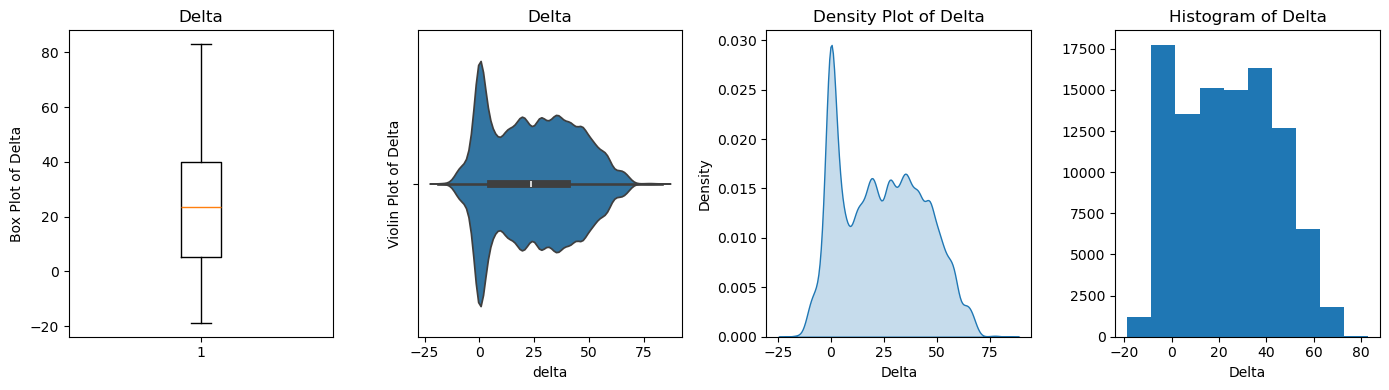

In [19]:
# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(14, 4))  # 1 row, 4 columns

# Box plot on the first subplot
axs[0].boxplot(df['delta'])
axs[0].set_title('Delta')
axs[0].set_ylabel('Box Plot of Delta')

# Violin plot on the second subplot, passed explicitly to ax
sns.violinplot(x="delta", data=df,fill=True, ax=axs[1])
axs[1].set_title('Delta')
axs[1].set_ylabel('Violin Plot of Delta')

sns.kdeplot(data=df['delta'], fill=True, ax=axs[2])
axs[2].set_title('Density Plot of Delta')
axs[2].set_xlabel('Delta')
axs[2].set_ylabel('Density')

axs[3].hist(df["delta"])
axs[3].set_title('Histogram of Delta')
axs[3].set_xlabel('Delta')

plt.tight_layout()
plt.show()

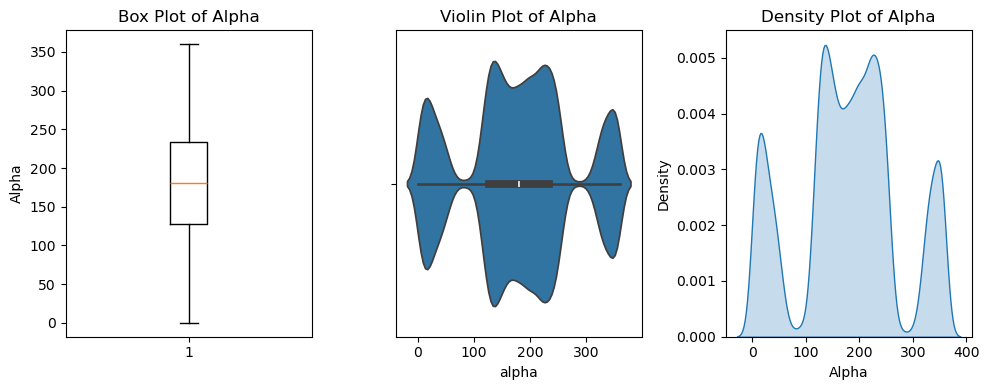

In [20]:
# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(10, 4))  # 1 row, 4 columns

# Box plot on the first subplot
axs[0].boxplot(df['alpha'])
axs[0].set_title('Box Plot of Alpha')
axs[0].set_ylabel('Alpha')

# Violin plot on the second subplot, passed explicitly to ax
sns.violinplot(x="alpha", data=df, ax=axs[1])
axs[1].set_title('Violin Plot of Alpha')
axs[1].set_xlabel('alpha')

sns.kdeplot(data=df['alpha'], fill=True, ax=axs[2])
axs[2].set_title('Density Plot of Alpha')
axs[2].set_xlabel('Alpha')
axs[2].set_ylabel('Density')

plt.tight_layout()
plt.show()

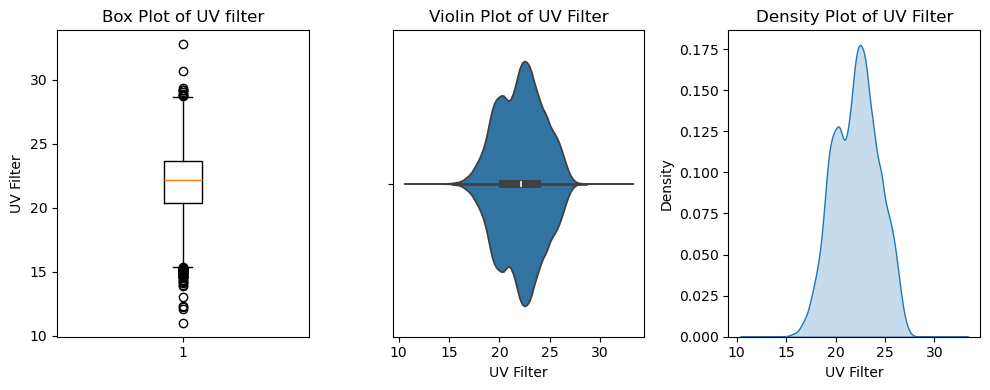

In [21]:
# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(10, 4))  # 1 row, 4 columns

# Box plot on the first subplot
axs[0].boxplot(df['UV_filter'])
axs[0].set_title('Box Plot of UV filter')
axs[0].set_ylabel('UV Filter')

# Violin plot on the second subplot, passed explicitly to ax
sns.violinplot(x='UV_filter', data=df, ax=axs[1])
axs[1].set_title('Violin Plot of UV Filter')
axs[1].set_xlabel('UV Filter')

# Density plot
sns.kdeplot(data=df['UV_filter'], fill=True, ax=axs[2])
axs[2].set_title('Density Plot of UV Filter')
axs[2].set_xlabel('UV Filter')
axs[2].set_ylabel('Density')

plt.tight_layout()
plt.show()

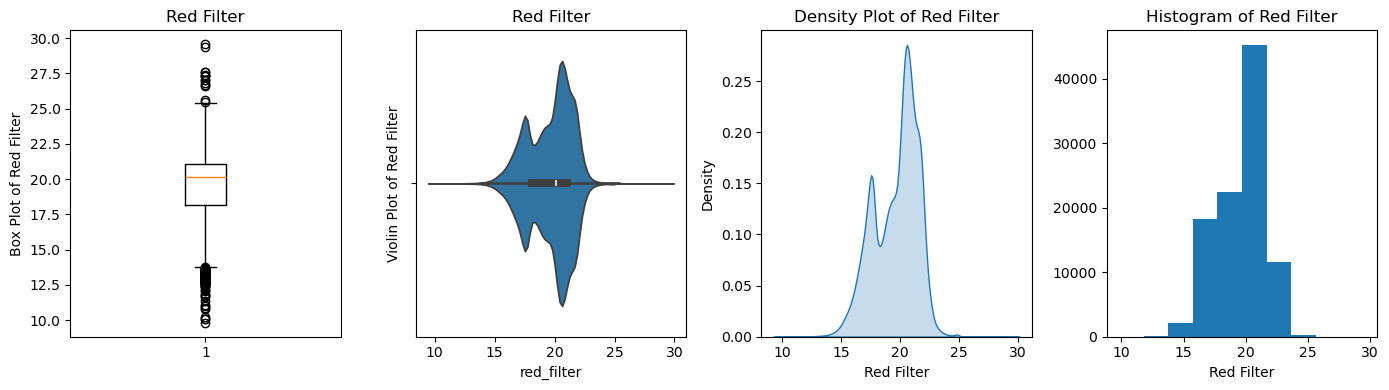

In [22]:
# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(14, 4))  # 1 row, 4 columns

# Box plot on the first subplot
axs[0].boxplot(df['red_filter'])
axs[0].set_title('Red Filter')
axs[0].set_ylabel('Box Plot of Red Filter')

# Violin plot on the second subplot, passed explicitly to ax
sns.violinplot(x='red_filter', data=df,fill=True, ax=axs[1])
axs[1].set_title('Red Filter')
axs[1].set_ylabel('Violin Plot of Red Filter')

sns.kdeplot(data=df['red_filter'], fill=True, ax=axs[2])
axs[2].set_title('Density Plot of Red Filter')
axs[2].set_xlabel('Red Filter')
axs[2].set_ylabel('Density')

axs[3].hist(df['red_filter'])
axs[3].set_title('Histogram of Red Filter')
axs[3].set_xlabel('Red Filter')

plt.tight_layout()
plt.show()

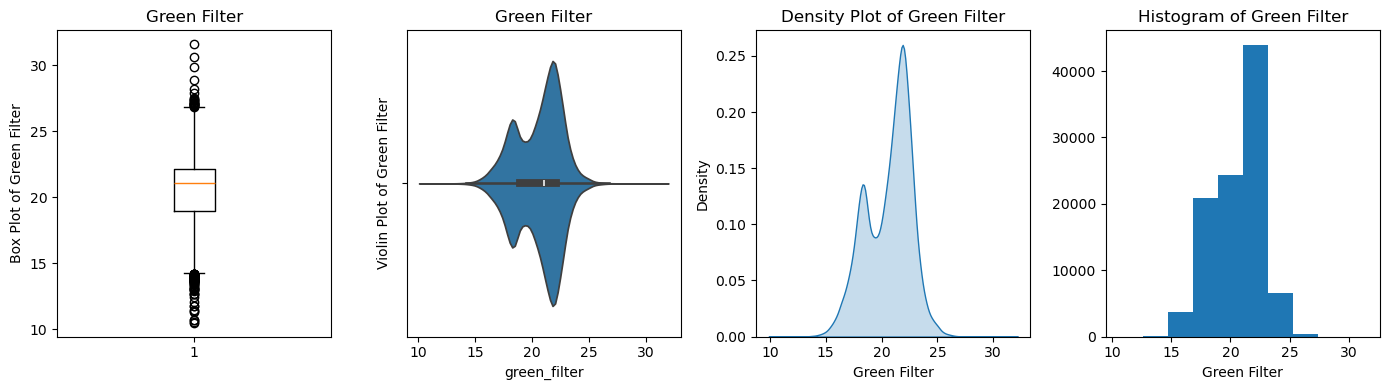

In [23]:
# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(14, 4))  # 1 row, 4 columns

# Box plot on the first subplot
axs[0].boxplot(df['green_filter'])
axs[0].set_title('Green Filter')
axs[0].set_ylabel('Box Plot of Green Filter')

# Violin plot on the second subplot, passed explicitly to ax
sns.violinplot(x='green_filter', data=df,fill=True, ax=axs[1])
axs[1].set_title('Green Filter')
axs[1].set_ylabel('Violin Plot of Green Filter')

sns.kdeplot(data=df['green_filter'], fill=True, ax=axs[2])
axs[2].set_title('Density Plot of Green Filter')
axs[2].set_xlabel('Green Filter')
axs[2].set_ylabel('Density')

axs[3].hist(df['green_filter'])
axs[3].set_title('Histogram of Green Filter')
axs[3].set_xlabel('Green Filter')

plt.tight_layout()
plt.show()

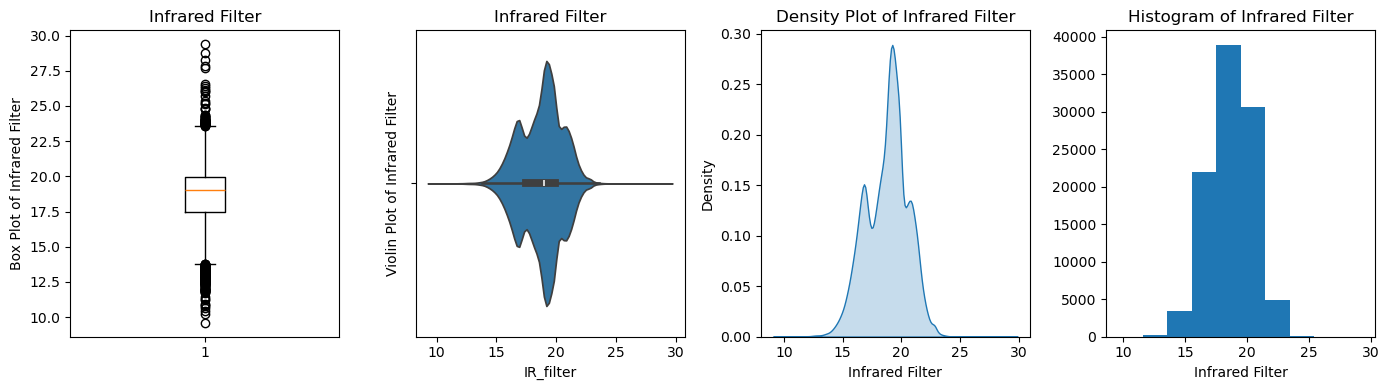

In [24]:
# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(14, 4))  # 1 row, 4 columns

# Box plot on the first subplot
axs[0].boxplot(df['IR_filter'])
axs[0].set_title('Infrared Filter')
axs[0].set_ylabel('Box Plot of Infrared Filter')

# Violin plot on the second subplot, passed explicitly to ax
sns.violinplot(x='IR_filter', data=df,fill=True, ax=axs[1])
axs[1].set_title('Infrared Filter')
axs[1].set_ylabel('Violin Plot of Infrared Filter')

sns.kdeplot(data=df['IR_filter'], fill=True, ax=axs[2])
axs[2].set_title('Density Plot of Infrared Filter')
axs[2].set_xlabel('Infrared Filter')
axs[2].set_ylabel('Density')

axs[3].hist(df['IR_filter'])
axs[3].set_title('Histogram of Infrared Filter')
axs[3].set_xlabel('Infrared Filter')

plt.tight_layout()
plt.show()

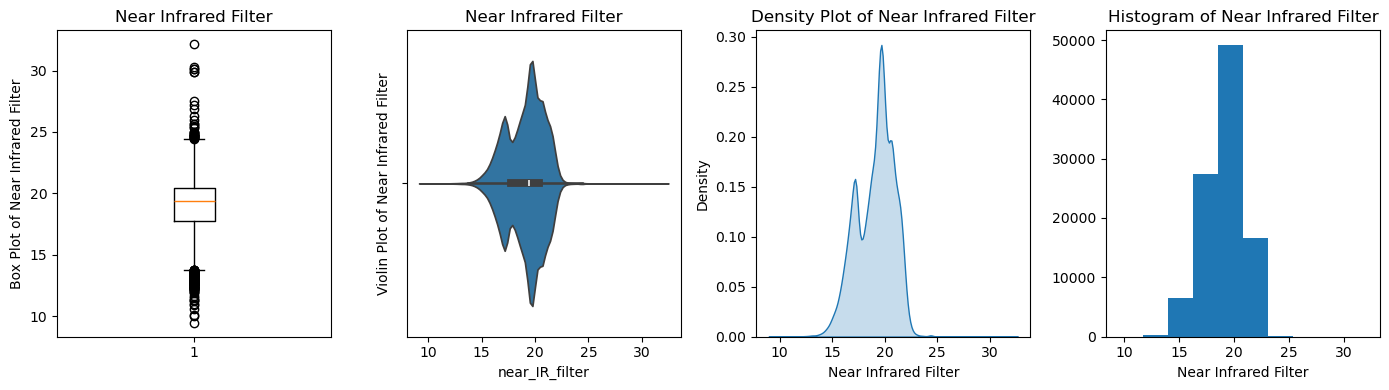

In [25]:
# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(14, 4))  # 1 row, 4 columns

# Box plot on the first subplot
axs[0].boxplot(df['near_IR_filter'])
axs[0].set_title('Near Infrared Filter')
axs[0].set_ylabel('Box Plot of Near Infrared Filter')

# Violin plot on the second subplot, passed explicitly to ax
sns.violinplot(x='near_IR_filter', data=df,fill=True, ax=axs[1])
axs[1].set_title('Near Infrared Filter')
axs[1].set_ylabel('Violin Plot of Near Infrared Filter')

sns.kdeplot(data=df['near_IR_filter'], fill=True, ax=axs[2])
axs[2].set_title('Density Plot of Near Infrared Filter')
axs[2].set_xlabel('Near Infrared Filter')
axs[2].set_ylabel('Density')

axs[3].hist(df['near_IR_filter'])
axs[3].set_title('Histogram of Near Infrared Filter')
axs[3].set_xlabel('Near Infrared Filter')

plt.tight_layout()
plt.show()

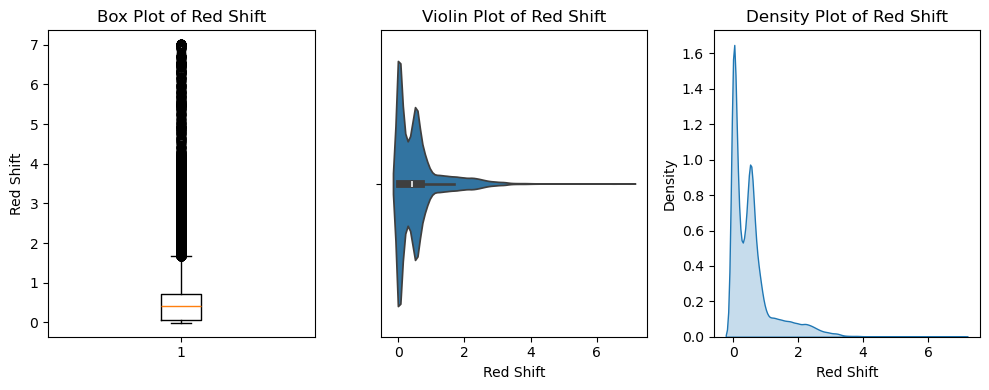

In [26]:
# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(10, 4))  # 1 row, 4 columns

# Box plot on the first subplot
axs[0].boxplot(df['red_shift'])
axs[0].set_title('Box Plot of Red Shift')
axs[0].set_ylabel('Red Shift')

# Violin plot on the second subplot, passed explicitly to ax
sns.violinplot(x='red_shift', data=df, ax=axs[1])
axs[1].set_title('Violin Plot of Red Shift')
axs[1].set_xlabel('Red Shift')

sns.kdeplot(data=df['red_shift'], fill=True, ax=axs[2])
axs[2].set_title('Density Plot of Red Shift')
axs[2].set_xlabel('Red Shift')
axs[2].set_ylabel('Density')

plt.tight_layout()
plt.show()

All features do not have a gaussian(bell-shaped) distribution, so we will be using standard scaler to normalize the data. 

##### <b>Discrete Data</b> #####

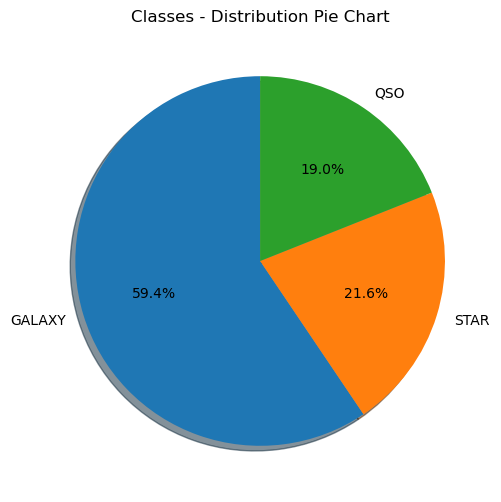

In [27]:
df['class'].value_counts().plot.pie(
    autopct='%1.1f%%',
    figsize=(6, 6),
    shadow=True,
    startangle=90,
    label='',  # Hides the y-axis label
    title='Classes - Distribution Pie Chart'
)
plt.show()

## <b>Data Cleaning</b>

- Basic Data Cleaning - Missing Values, Mistyped values
- Remove irrelevant columns - All ID columns, some ID columns are related to the features used in predicting
- Normalize Dataset
- Address Outliers
- Dimensionality and reducing Multicolinearity - Use PCA to create new features derived from old ones
- Feature engineering - Convert MJD to seasons
- Data Binnning/Discretization
- imputation for missing values - "alpha" and "delta"

In [28]:
df['alpha'] = pd.to_numeric(df['alpha'], errors='coerce')
# drop rows with failed conversions
df = df.dropna(subset=['alpha'])

In [29]:
# drop missing rows
df = df.dropna()

In [30]:
df.isna().sum()

alpha             0
delta             0
UV_filter         0
green_filter      0
red_filter        0
near_IR_filter    0
IR_filter         0
red_shift         0
MJD               0
class             0
dtype: int64

No Null/Missing values in dataset.

In [31]:
df

,alpha,delta,UV_filter,green_filter,red_filter,near_IR_filter,IR_filter,red_shift,MJD,class
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794,56354,GALAXY
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136,58158,GALAXY
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195,55592,GALAXY
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346,58039,GALAXY
5,340.995120,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,1.424659,55855,QSO
...,...,...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,0.000000,57749,GALAXY
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,0.404895,56934,GALAXY
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,0.143366,54535,GALAXY
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,0.455040,56368,GALAXY


#### <b>Feature Engineering</b>

In [32]:
# Converting MJD into universal date
df['datetime'] = pd.to_datetime(df['MJD'], origin='1858-11-17', unit='D')
df

,alpha,delta,UV_filter,green_filter,red_filter,near_IR_filter,IR_filter,red_shift,MJD,class,datetime
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794,56354,GALAXY,2013-03-03
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136,58158,GALAXY,2018-02-09
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195,55592,GALAXY,2011-01-31
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346,58039,GALAXY,2017-10-13
5,340.995120,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,1.424659,55855,QSO,2011-10-21
...,...,...,...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,0.000000,57749,GALAXY,2016-12-27
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,0.404895,56934,GALAXY,2014-10-04
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,0.143366,54535,GALAXY,2008-03-10
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,0.455040,56368,GALAXY,2013-03-17


In [33]:
# Perfom feature engineering for the dates -> summer, autumn, spring, winter
def get_season(date):
    # Dummy date
    Y = 2000
    spring = (pd.Timestamp(f'{Y}-03-21'), pd.Timestamp(f'{Y}-06-20'))
    summer = (pd.Timestamp(f'{Y}-06-21'), pd.Timestamp(f'{Y}-09-22'))
    fall   = (pd.Timestamp(f'{Y}-09-23'), pd.Timestamp(f'{Y}-12-20'))

    try:
        date = date.replace(year=Y)
    except ValueError:
        broken_dates += date
        return None  # fallback for broken dates

    if spring[0] <= date <= spring[1]:
        return 'Spring'
    elif summer[0] <= date <= summer[1]:
        return 'Summer'
    elif fall[0] <= date <= fall[1]:
        return 'Fall'
    else:
        return 'Winter'

# Apply the function to our df, this adds a new column ("season") into out dataframe
df['season'] = df['datetime'].apply(get_season)

In [34]:
df

,alpha,delta,UV_filter,green_filter,red_filter,near_IR_filter,IR_filter,red_shift,MJD,class,datetime,season
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794,56354,GALAXY,2013-03-03,Winter
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136,58158,GALAXY,2018-02-09,Winter
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195,55592,GALAXY,2011-01-31,Winter
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346,58039,GALAXY,2017-10-13,Fall
5,340.995120,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,1.424659,55855,QSO,2011-10-21,Fall
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,0.000000,57749,GALAXY,2016-12-27,Winter
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,0.404895,56934,GALAXY,2014-10-04,Fall
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,0.143366,54535,GALAXY,2008-03-10,Winter
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,0.455040,56368,GALAXY,2013-03-17,Winter


In [35]:
#Removing Date Columns
df = df.drop(["MJD", "datetime"], axis=1)

#### <b>One Hot Encoding</b>

In [36]:
encoded_df = pd.get_dummies(df, columns=["season"], dtype=int)
encoded_df

,alpha,delta,UV_filter,green_filter,red_filter,near_IR_filter,IR_filter,red_shift,class,season_Fall,season_Spring,season_Summer,season_Winter
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794,GALAXY,0,0,0,1
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136,GALAXY,0,0,0,1
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195,GALAXY,0,0,0,1
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346,GALAXY,1,0,0,0
5,340.995120,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,1.424659,QSO,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,0.000000,GALAXY,0,0,0,1
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,0.404895,GALAXY,1,0,0,0
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,0.143366,GALAXY,0,0,0,1
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,0.455040,GALAXY,0,0,0,1


In [37]:
df = encoded_df

#### <b>Outlier Analysis and Removal</b>

##### <b>Outlier Analysis Function</b> #####

In [38]:
def IQRThreshold(dataframe, col_name, q1, q3, multiplier=1.5):
    #Get Q1 and Q3 of the specified column
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + multiplier * interquantile_range
    low_limit = quartile1 -  multiplier * interquantile_range
    return low_limit, up_limit

In [39]:
def getOutliers(dataframe, col_name, index=False, q1=0.25, q3=0.75):
    lower, upper = IQRThreshold(dataframe, col_name, q1, q3)

    outliers = dataframe[(dataframe[col_name] < lower) | (dataframe[col_name] > upper)]
    return outliers

In [40]:
def getExtremeOutliers(dataframe, col_name, index=False, q1=0.25, q3=0.75):

    # For extreme outliers, the common multiplier for IQR is 3.0
    lower, upper = IQRThreshold(dataframe, col_name, q1, q3, multiplier=3.0)

    extreme_outliers = dataframe[(dataframe[col_name] < lower) | (dataframe[col_name] > upper)]

    if index:
        return extreme_outliers.index
    else:
        return extreme_outliers

##### <b>View Outliers</b>

alpha outliers:
No outliers were detected for alpha.

delta outliers:
No outliers were detected for delta.

UV_filter outliers:


,alpha,delta,UV_filter,green_filter,red_filter,near_IR_filter,IR_filter,red_shift,class,season_Fall,season_Spring,season_Summer,season_Winter
1046,0.115997,22.714164,29.19901,25.35543,23.48086,21.56495,17.17135,0.253981,QSO,1,0,0,0
4401,184.282050,7.624347,14.50678,12.67902,11.74664,11.29956,10.91847,0.007590,GALAXY,0,0,0,1
4472,239.423127,28.548438,12.26240,10.51139,10.06854,13.41786,10.22551,0.000025,STAR,0,0,0,1
6839,115.035475,49.271060,28.90174,19.24543,17.47902,16.80563,16.72323,0.787060,GALAXY,1,0,0,0
14227,84.217686,4.929016,14.64972,12.63574,12.14340,11.96598,13.13046,0.000290,STAR,1,0,0,0


(55, 13)


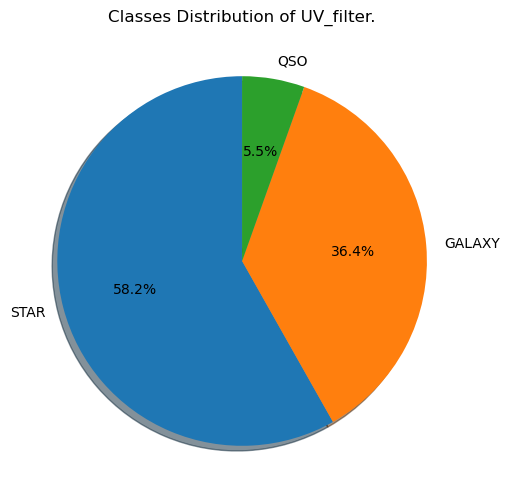

green_filter outliers:


,alpha,delta,UV_filter,green_filter,red_filter,near_IR_filter,IR_filter,red_shift,class,season_Fall,season_Spring,season_Summer,season_Winter
1124,22.433297,-1.241425,15.87450,14.02731,13.20467,12.80524,12.51869,0.017313,GALAXY,1,0,0,0
1708,143.138181,36.038534,27.80030,27.07299,22.63593,21.16288,19.30990,0.664254,GALAXY,0,1,0,0
1735,163.126884,45.786873,25.31965,28.90320,21.18100,20.03103,17.84232,-0.000188,STAR,0,1,0,0
3067,241.667426,30.099069,15.66604,13.83470,12.80579,12.22783,11.78913,0.021899,GALAXY,0,0,1,0
4160,3.127945,26.793295,21.99818,27.15748,21.39167,19.98409,18.74382,0.879488,GALAXY,1,0,0,0


(98, 13)


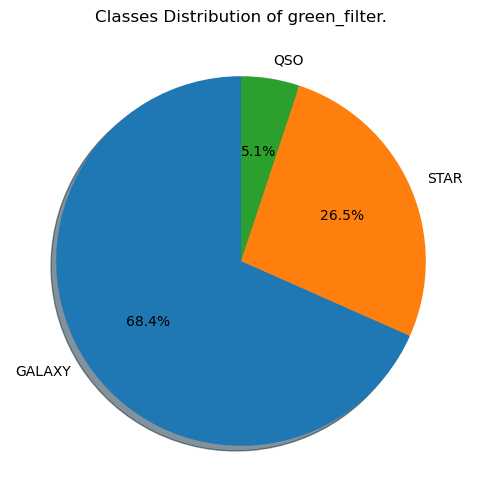

red_filter outliers:


,alpha,delta,UV_filter,green_filter,red_filter,near_IR_filter,IR_filter,red_shift,class,season_Fall,season_Spring,season_Summer,season_Winter
786,252.873026,19.416624,16.15454,14.30195,13.45793,13.03615,12.71279,0.022582,GALAXY,0,1,0,0
1124,22.433297,-1.241425,15.87450,14.02731,13.20467,12.80524,12.51869,0.017313,GALAXY,1,0,0,0
2823,135.998613,51.210149,15.72869,14.47018,13.65948,13.42487,13.39041,-0.000083,STAR,0,1,0,0
3067,241.667426,30.099069,15.66604,13.83470,12.80579,12.22783,11.78913,0.021899,GALAXY,0,0,1,0
3087,23.510250,-1.075744,16.10737,14.45376,13.65585,13.22250,12.83522,0.015473,GALAXY,1,0,0,0


(132, 13)


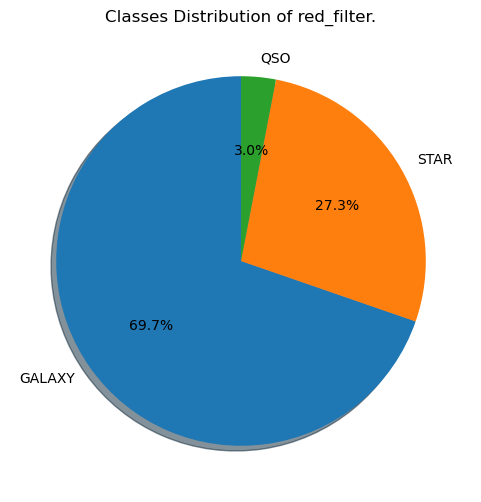

near_IR_filter outliers:


,alpha,delta,UV_filter,green_filter,red_filter,near_IR_filter,IR_filter,red_shift,class,season_Fall,season_Spring,season_Summer,season_Winter
238,66.518205,17.120654,19.05087,16.49607,14.96787,13.62782,12.39726,0.000086,STAR,1,0,0,0
786,252.873026,19.416624,16.15454,14.30195,13.45793,13.03615,12.71279,0.022582,GALAXY,0,1,0,0
1124,22.433297,-1.241425,15.87450,14.02731,13.20467,12.80524,12.51869,0.017313,GALAXY,1,0,0,0
1862,209.374661,32.557562,21.88364,24.96677,17.41405,24.78471,20.24118,0.482955,GALAXY,0,0,0,1
2823,135.998613,51.210149,15.72869,14.47018,13.65948,13.42487,13.39041,-0.000083,STAR,0,1,0,0


(198, 13)


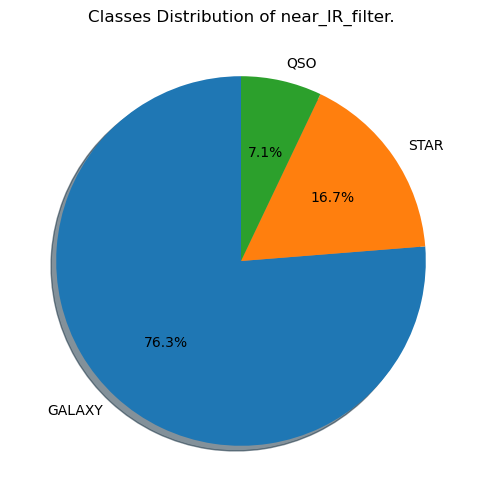

IR_filter outliers:


,alpha,delta,UV_filter,green_filter,red_filter,near_IR_filter,IR_filter,red_shift,class,season_Fall,season_Spring,season_Summer,season_Winter
238,66.518205,17.120654,19.05087,16.49607,14.96787,13.62782,12.39726,0.000086,STAR,1,0,0,0
367,249.936105,45.386083,22.73596,22.51808,22.18846,21.76720,23.99034,1.545372,QSO,0,1,0,0
786,252.873026,19.416624,16.15454,14.30195,13.45793,13.03615,12.71279,0.022582,GALAXY,0,1,0,0
1124,22.433297,-1.241425,15.87450,14.02731,13.20467,12.80524,12.51869,0.017313,GALAXY,1,0,0,0
2823,135.998613,51.210149,15.72869,14.47018,13.65948,13.42487,13.39041,-0.000083,STAR,0,1,0,0


(319, 13)


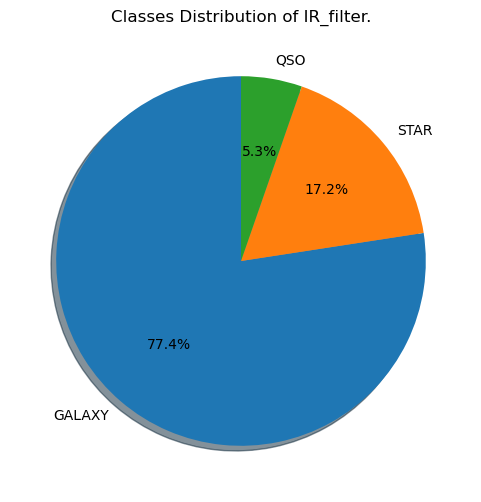

red_shift outliers:


,alpha,delta,UV_filter,green_filter,red_filter,near_IR_filter,IR_filter,red_shift,class,season_Fall,season_Spring,season_Summer,season_Winter
17,1.494389,3.291746,20.38562,20.40514,20.29996,20.05918,19.89044,2.031528,QSO,1,0,0,0
23,145.883005,47.300484,21.73992,21.53095,21.26763,21.36257,21.15861,2.075680,QSO,0,0,0,1
47,228.447728,12.745032,22.36261,21.71060,21.59630,21.60179,21.12727,2.689002,QSO,0,1,0,0
71,178.504616,54.379157,21.77434,21.65529,21.77547,21.72382,21.66425,1.939080,QSO,0,0,0,1
83,187.973425,42.288816,23.33354,22.08951,21.85797,22.16238,22.55171,2.188856,QSO,0,1,0,0


(8987, 13)


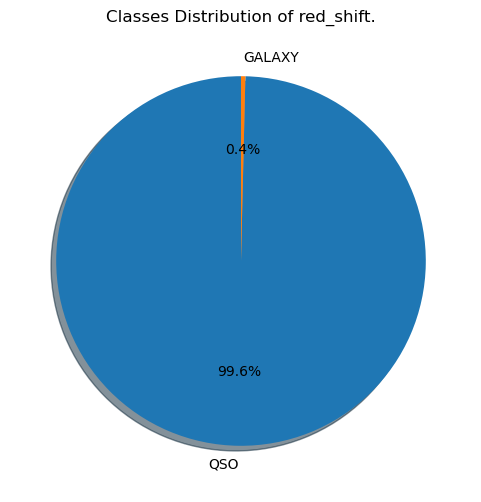

season_Fall outliers:
No outliers were detected for season_Fall.

season_Spring outliers:
No outliers were detected for season_Spring.

season_Summer outliers:


,alpha,delta,UV_filter,green_filter,red_filter,near_IR_filter,IR_filter,red_shift,class,season_Fall,season_Spring,season_Summer,season_Winter
12,345.801874,32.672868,23.17274,20.14496,19.41948,19.22034,18.89359,0.000072,STAR,0,0,1,0
13,331.502030,10.035802,20.82940,18.75091,17.51118,17.01631,16.62772,0.152194,GALAXY,0,0,1,0
24,241.426267,27.224695,18.88323,17.54229,17.01789,16.75376,16.72259,0.032081,GALAXY,0,0,1,0
28,333.311511,-0.376123,20.53324,18.84066,18.05369,17.60397,17.29030,0.091085,GALAXY,0,0,1,0
29,337.093435,-0.311773,20.15491,18.37295,17.31276,16.82294,16.44342,0.148228,GALAXY,0,0,1,0


(9113, 13)


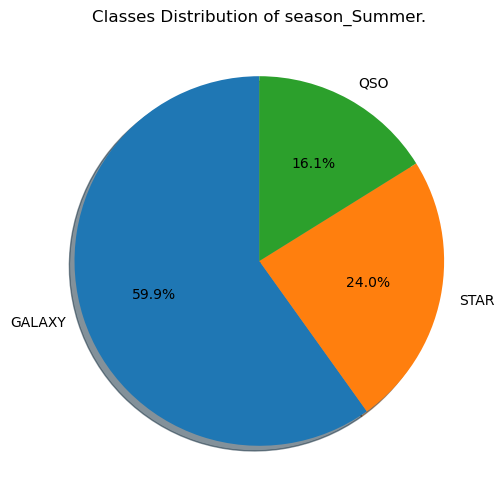

season_Winter outliers:
No outliers were detected for season_Winter.



In [41]:
numerical_cols = df.select_dtypes(exclude=["object"]).columns
for c in numerical_cols:
    print(f"{c} outliers:")
    outliers = getOutliers(df, c)
    if outliers.empty:
        print(f"No outliers were detected for {c}.\n")
    else:
        display(outliers.head())
        print(outliers.shape)
        outliers['class'].value_counts().plot.pie(
            autopct='%1.1f%%',
            figsize=(6, 6),
            shadow=True,
            startangle=90,
            label='',  
            title=f'Classes Distribution of {c}.'
    )
    plt.show()


alpha outliers:
No outliers were detected for alpha.

delta outliers:
No outliers were detected for delta.

UV_filter outliers:
No outliers were detected for UV_filter.

green_filter outliers:


,alpha,delta,UV_filter,green_filter,red_filter,near_IR_filter,IR_filter,red_shift,class,season_Fall,season_Spring,season_Summer,season_Winter
16115,145.757641,31.869546,18.8541,31.60224,17.28707,16.9323,16.35421,0.767975,GALAXY,0,0,0,1


(1, 13)


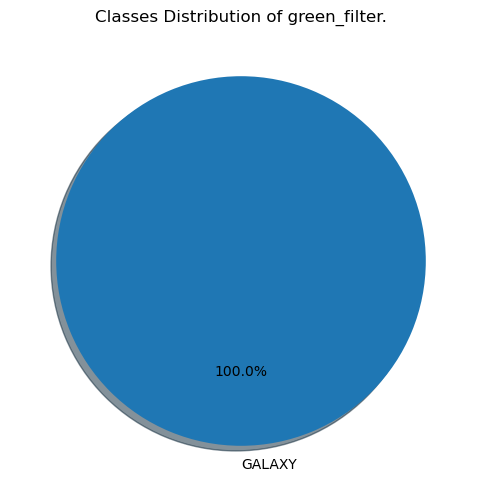

red_filter outliers:
No outliers were detected for red_filter.

near_IR_filter outliers:


,alpha,delta,UV_filter,green_filter,red_filter,near_IR_filter,IR_filter,red_shift,class,season_Fall,season_Spring,season_Summer,season_Winter
8934,169.053816,20.310490,20.27785,19.92843,16.17048,30.154600,18.290560,0.781847,QSO,0,0,0,1
14498,84.230172,7.138590,14.15199,10.73097,9.82207,9.469903,9.612333,0.000051,STAR,1,0,0,0
21245,22.566355,0.950467,30.66039,30.60700,29.37411,30.250090,16.822990,-0.000456,STAR,1,0,0,0
29689,146.345791,24.566331,18.50142,18.51986,20.75484,30.163590,27.673360,1.086811,GALAXY,0,0,0,1
85950,255.213997,28.549537,20.65719,19.14651,20.99419,29.889210,27.805190,0.144278,GALAXY,0,1,0,0


(7, 13)


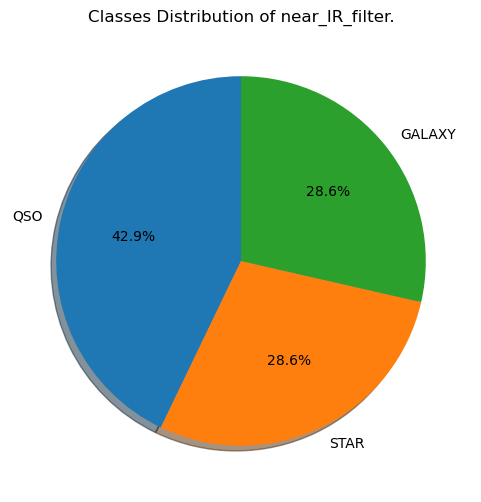

IR_filter outliers:


,alpha,delta,UV_filter,green_filter,red_filter,near_IR_filter,IR_filter,red_shift,class,season_Fall,season_Spring,season_Summer,season_Winter
14498,84.230172,7.138590,14.15199,10.73097,9.82207,9.469903,9.612333,0.000051,STAR,1,0,0,0
29689,146.345791,24.566331,18.50142,18.51986,20.75484,30.163590,27.673360,1.086811,GALAXY,0,0,0,1
40201,36.908884,-1.982394,20.00673,20.29219,18.54149,17.813190,28.238290,0.593243,GALAXY,0,0,0,1
55524,2.063615,10.823692,19.09952,18.02618,16.74526,16.221250,29.383740,0.625697,GALAXY,0,0,0,1
85950,255.213997,28.549537,20.65719,19.14651,20.99419,29.889210,27.805190,0.144278,GALAXY,0,1,0,0


(6, 13)


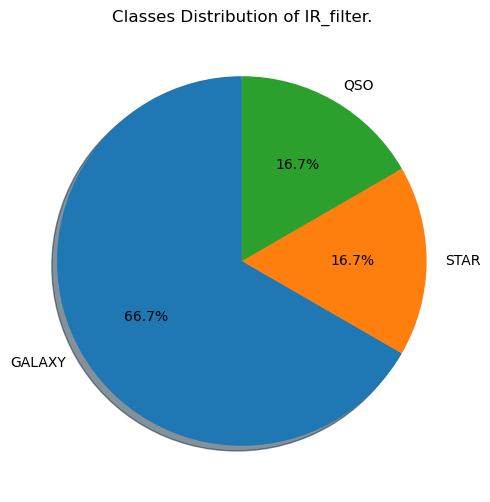

red_shift outliers:


,alpha,delta,UV_filter,green_filter,red_filter,near_IR_filter,IR_filter,red_shift,class,season_Fall,season_Spring,season_Summer,season_Winter
47,228.447728,12.745032,22.36261,21.71060,21.59630,21.60179,21.12727,2.689002,QSO,0,1,0,0
115,185.353726,-2.581337,20.71064,20.22823,19.85220,19.59367,19.34152,2.875383,QSO,0,0,0,1
116,161.751689,-2.308346,24.64835,22.00048,21.63793,21.72727,22.06267,3.892739,QSO,0,0,0,1
161,2.172226,16.196656,21.58020,20.57191,20.39050,20.20049,20.35182,2.897480,QSO,1,0,0,0
209,346.501925,12.663103,22.28893,21.60472,21.37432,21.39408,20.87335,2.701146,QSO,1,0,0,0


(2229, 13)


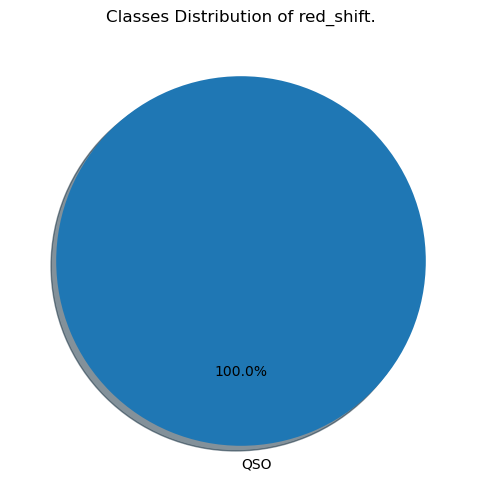

season_Fall outliers:
No outliers were detected for season_Fall.

season_Spring outliers:
No outliers were detected for season_Spring.

season_Summer outliers:


,alpha,delta,UV_filter,green_filter,red_filter,near_IR_filter,IR_filter,red_shift,class,season_Fall,season_Spring,season_Summer,season_Winter
12,345.801874,32.672868,23.17274,20.14496,19.41948,19.22034,18.89359,0.000072,STAR,0,0,1,0
13,331.502030,10.035802,20.82940,18.75091,17.51118,17.01631,16.62772,0.152194,GALAXY,0,0,1,0
24,241.426267,27.224695,18.88323,17.54229,17.01789,16.75376,16.72259,0.032081,GALAXY,0,0,1,0
28,333.311511,-0.376123,20.53324,18.84066,18.05369,17.60397,17.29030,0.091085,GALAXY,0,0,1,0
29,337.093435,-0.311773,20.15491,18.37295,17.31276,16.82294,16.44342,0.148228,GALAXY,0,0,1,0


(9113, 13)


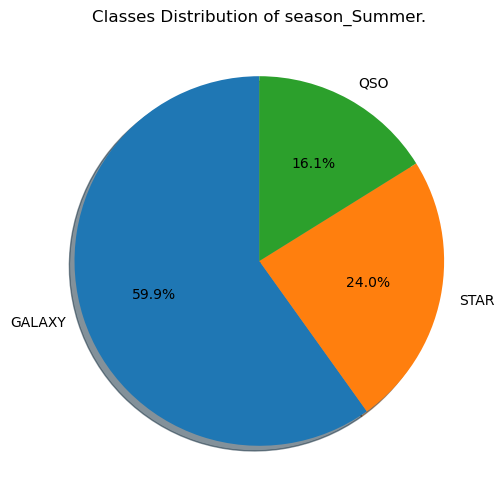

season_Winter outliers:
No outliers were detected for season_Winter.



In [42]:
numerical_cols = df.select_dtypes(exclude=["object"]).columns
for c in numerical_cols:
    print(f"{c} outliers:")
    outliers = getExtremeOutliers(df, c)
    if outliers.empty:
        print(f"No outliers were detected for {c}.\n")
    else:
        display(outliers.head())
        print(outliers.shape)
        outliers['class'].value_counts().plot.pie(
            autopct='%1.1f%%',
            figsize=(6, 6),
            shadow=True,
            startangle=90,
            label='',  
            title=f'Classes Distribution of {c}.'
    )
    plt.show()


Comparing the pie chart of the outlier values of class and the pie chart from the original values of the dataframe, all the pie charts seem to be quite similar except the redshift outlier chart.
Let's analyse.

In [43]:
rs_check=getOutliers(df, "red_shift")
rs_check["class"].value_counts().get("QSO", 0)

np.int64(8953)

In [44]:
rs_check.shape

(8987, 13)

In [45]:
count = 0
for x in df["class"]:
    if x == "QSO":
        count += 1
print(count)

18960


In our outlier analysis function, we noted that 9809 rows of data has QSO as it's final class as an outlier, this suggests that QSO objects have a much greater redshift than Stars or Galaxy

##### <b>Removing Outliers</b> #####

Most of the outliers for red shift in a star belong to the quasar object(QSO) class. So, outliers for red shift do not need to be removed.
Although the outlier values are extreme, they represent true data, capable of affecting the accuracy of the model, hence we will not be removing any outliers for this dataset.

#### <b>Feature Scaling</b> ####

- We need to scale our features before performing PCA and investigating multicolinearity, we will use standardization and min max scaling.

Feature scaling refers to transforming features so they’re on a comparable scale.
The two common types are:

- Standardization (mean = 0, std = 1)

- Min-max normalization (range = [0, 1])

It improves model performance for algorithms sensitive to feature magnitude, such as SVM, logistic regression.
- These machine learning models to the magnitude of feature value.
- Large values can dominate smaller ones leading to <b>Model Distortion</b>

In [46]:
from sklearn.preprocessing import StandardScaler

#### <b>Standard Scaler</b> ####

In [47]:
scaler = StandardScaler()
std_scaled_cols = df.drop(['class', "season_Fall", "season_Summer", "season_Winter", "season_Spring"], axis=1).columns
df_std_scaled = df[std_scaled_cols]

# Convert the scaled array back to a DataFrame for better readability
df_scaled = pd.DataFrame(scaler.fit_transform(df_std_scaled),
                         columns=std_scaled_cols,
                         index=df_std_scaled.index)
df_scaled

,alpha,delta,UV_filter,green_filter,red_filter,near_IR_filter,IR_filter,red_shift
0,-0.434549,0.425523,0.798794,0.806782,0.403934,0.045977,0.013971,0.079541
1,-0.339867,0.363396,1.198064,1.079971,1.584378,1.185058,1.611127,0.277076
2,-0.367196,0.582708,1.413733,0.997516,0.519717,0.149987,0.101492,0.092407
3,1.669573,-1.249118,0.024928,1.543652,1.059876,0.807573,0.272404,0.486746
5,1.692931,-0.180507,0.625296,1.328274,0.903699,0.666274,0.439642,1.160485
...,...,...,...,...,...,...,...,...
99995,-1.430056,-1.360663,0.038597,1.150641,1.217536,1.263197,1.113627,-0.789185
99996,-1.534996,-0.220753,0.271197,0.861255,0.433598,0.382663,0.365927,-0.235079
99997,0.486658,-0.429370,-0.404945,-0.668337,-0.777211,-0.793315,-0.802286,-0.592986
99998,0.359005,1.146628,1.452524,0.493762,0.144519,-0.007036,-0.081664,-0.166455


In [48]:
non_standardized_df = df.drop(['alpha', 'delta', 'UV_filter', 'green_filter', 'red_filter', 'near_IR_filter', 'IR_filter', 'red_shift'], axis=1)
display(non_standardized_df)

,class,season_Fall,season_Spring,season_Summer,season_Winter
0,GALAXY,0,0,0,1
1,GALAXY,0,0,0,1
2,GALAXY,0,0,0,1
3,GALAXY,1,0,0,0
5,QSO,1,0,0,0
...,...,...,...,...,...
99995,GALAXY,0,0,0,1
99996,GALAXY,1,0,0,0
99997,GALAXY,0,0,0,1
99998,GALAXY,0,0,0,1


In [49]:
# Combine the standard scaled dataframe with the unscaled data
combined_df = pd.concat([df_scaled,  non_standardized_df], axis=1)
display(combined_df)

,alpha,delta,UV_filter,green_filter,red_filter,near_IR_filter,IR_filter,red_shift,class,season_Fall,season_Spring,season_Summer,season_Winter
0,-0.434549,0.425523,0.798794,0.806782,0.403934,0.045977,0.013971,0.079541,GALAXY,0,0,0,1
1,-0.339867,0.363396,1.198064,1.079971,1.584378,1.185058,1.611127,0.277076,GALAXY,0,0,0,1
2,-0.367196,0.582708,1.413733,0.997516,0.519717,0.149987,0.101492,0.092407,GALAXY,0,0,0,1
3,1.669573,-1.249118,0.024928,1.543652,1.059876,0.807573,0.272404,0.486746,GALAXY,1,0,0,0
5,1.692931,-0.180507,0.625296,1.328274,0.903699,0.666274,0.439642,1.160485,QSO,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-1.430056,-1.360663,0.038597,1.150641,1.217536,1.263197,1.113627,-0.789185,GALAXY,0,0,0,1
99996,-1.534996,-0.220753,0.271197,0.861255,0.433598,0.382663,0.365927,-0.235079,GALAXY,1,0,0,0
99997,0.486658,-0.429370,-0.404945,-0.668337,-0.777211,-0.793315,-0.802286,-0.592986,GALAXY,0,0,0,1
99998,0.359005,1.146628,1.452524,0.493762,0.144519,-0.007036,-0.081664,-0.166455,GALAXY,0,0,0,1


In [50]:
df=combined_df

In [51]:
# Checking the standard deviation of the scaled features
df.describe()

,alpha,delta,UV_filter,green_filter,red_filter,near_IR_filter,IR_filter,red_shift,season_Fall,season_Spring,season_Summer,season_Winter
count,9.998900e+04,9.998900e+04,9.998900e+04,9.998900e+04,9.998900e+04,9.998900e+04,9.998900e+04,9.998900e+04,99989.000000,99989.000000,99989.00000,99989.000000
mean,-1.966999e-16,-7.674706e-17,-1.179631e-15,2.177769e-15,1.143815e-15,-1.067353e-16,6.549793e-16,-2.458748e-17,0.290892,0.303353,0.09114,0.314615
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,0.454176,0.459709,0.28781,0.464365
min,-1.840568e+00,-2.184877e+00,-4.924168e+00,-4.973824e+00,-5.296528e+00,-5.469600e+00,-5.185030e+00,-8.028295e-01,0.000000,0.000000,0.00000,0.000000
25%,-5.192477e-01,-9.665473e-01,-7.677383e-01,-8.178847e-01,-8.140139e-01,-7.693889e-01,-7.405750e-01,-7.145776e-01,0.000000,0.000000,0.00000,0.000000
50%,3.395353e-02,-2.489194e-02,4.372823e-02,2.298996e-01,2.585395e-01,1.821732e-01,1.333887e-01,-2.086922e-01,0.000000,0.000000,0.00000,0.000000
75%,5.830734e-01,8.025763e-01,7.136377e-01,7.324011e-01,7.542717e-01,7.461362e-01,6.523897e-01,1.745353e-01,1.000000,1.000000,0.00000,1.000000
max,1.889867e+00,2.996519e+00,4.753672e+00,5.384766e+00,5.351686e+00,7.427368e+00,6.010629e+00,8.805823e+00,1.000000,1.000000,1.00000,1.000000


#### <b>Feature Multicolinearity</b> ####

- Multicolinearity Between Features refers to features haveing <b>high</b> correlation with one another
- Features are supposed to be independent of one another
- Models can capture this relationship, instead of capturing real data

##### <b>Using Variance Inflation Factor(VIF) to calculate multicolinearity</b> #####

- Variance Inflation Factor (VIF) measures the multicolinearity of variables

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [53]:
vif_df = df.drop(["class"], axis=1)
vif_df

,alpha,delta,UV_filter,green_filter,red_filter,near_IR_filter,IR_filter,red_shift,season_Fall,season_Spring,season_Summer,season_Winter
0,-0.434549,0.425523,0.798794,0.806782,0.403934,0.045977,0.013971,0.079541,0,0,0,1
1,-0.339867,0.363396,1.198064,1.079971,1.584378,1.185058,1.611127,0.277076,0,0,0,1
2,-0.367196,0.582708,1.413733,0.997516,0.519717,0.149987,0.101492,0.092407,0,0,0,1
3,1.669573,-1.249118,0.024928,1.543652,1.059876,0.807573,0.272404,0.486746,1,0,0,0
5,1.692931,-0.180507,0.625296,1.328274,0.903699,0.666274,0.439642,1.160485,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-1.430056,-1.360663,0.038597,1.150641,1.217536,1.263197,1.113627,-0.789185,0,0,0,1
99996,-1.534996,-0.220753,0.271197,0.861255,0.433598,0.382663,0.365927,-0.235079,1,0,0,0
99997,0.486658,-0.429370,-0.404945,-0.668337,-0.777211,-0.793315,-0.802286,-0.592986,0,0,0,1
99998,0.359005,1.146628,1.452524,0.493762,0.144519,-0.007036,-0.081664,-0.166455,0,0,0,1


In [54]:
df['Constant'] = 1

vif_data = pd.DataFrame()

vif_data["Feature"] = vif_df.columns[:-1]

vif_data["VIF"] = [variance_inflation_factor(vif_df.values, i) for i in range(vif_df.shape[1] - 1)]

display(vif_data)

,Feature,VIF
0,alpha,1.145473
1,delta,1.185567
2,UV_filter,4.326320
3,green_filter,18.425218
4,red_filter,42.047469
5,near_IR_filter,42.137391
6,IR_filter,21.050150
7,red_shift,1.390569
8,season_Fall,1.109993
9,season_Spring,1.092286


Multicolinearity Legend:
- VIF =< 5 -> Little colinearity
- VIF > 10 -> High colinearity

- Some of our features are highly colinear - to visualize this colinearity I have generated a heatmap 
- To address this multicolinearity, we will use Principle Component Analysis to reduce multicolinearity

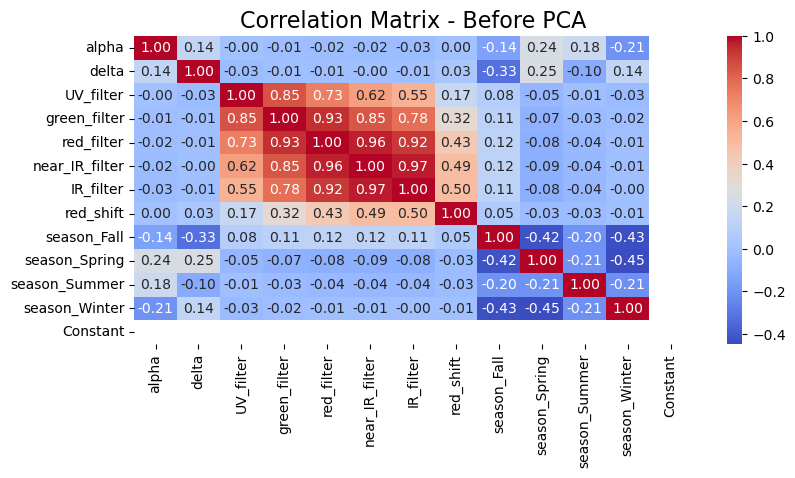

In [55]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder

fig = plt.figure(figsize=(9,4))

numCorr = df.select_dtypes(exclude="object").corr()

sns.heatmap(numCorr, cbar=True, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Matrix - Before PCA", fontsize=16)
plt.show()

- near_IR_filter and red filter is <b> too correlated </b>to one another (0.96)
- green_filter_uv

Features for PCA:
- green_filter, red_filter, near_IR_filter, IR_filter

##### <b>Performing Principle Component Analysis(PCA) to reduce dimensionality and multicolinearity</b> #####

- PCA refers to Principle Component Analysis
- We need to scale our features before performing PCA and investigating multicolinearity, we used standardization to scale features

In [56]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

In [57]:
# Use features that have a VIF of > 5
pca_vif_selected_rows = vif_df[[
    "UV_filter",
    "green_filter",
    "red_filter",
    "near_IR_filter",
    "IR_filter",
]]

# Display the resultd
display(pca_vif_selected_rows)

,UV_filter,green_filter,red_filter,near_IR_filter,IR_filter
0,0.798794,0.806782,0.403934,0.045977,0.013971
1,1.198064,1.079971,1.584378,1.185058,1.611127
2,1.413733,0.997516,0.519717,0.149987,0.101492
3,0.024928,1.543652,1.059876,0.807573,0.272404
5,0.625296,1.328274,0.903699,0.666274,0.439642
...,...,...,...,...,...
99995,0.038597,1.150641,1.217536,1.263197,1.113627
99996,0.271197,0.861255,0.433598,0.382663,0.365927
99997,-0.404945,-0.668337,-0.777211,-0.793315,-0.802286
99998,1.452524,0.493762,0.144519,-0.007036,-0.081664


In [58]:
pca = PCA()
x_pca = pca.fit(pca_vif_selected_rows)

explained_variance=pca.explained_variance_ratio_

df_variance = pd.DataFrame({
    "Principal Component": [f"PC{i+1}" for i in range(len(explained_variance))],
    "Explained Variance Ratio": explained_variance,
    "Cumulative Variance": np.cumsum(explained_variance)
})

# Formating the variance as percentage
df_variance["Explained Variance (%)"] = df_variance["Explained Variance Ratio"] * 100
df_variance["Cumulative Variance (%)"] = df_variance["Cumulative Variance"] * 100

# Round for display
df_variance = df_variance.round(4)

# Display
display(df_variance)

,Principal Component,Explained Variance Ratio,Cumulative Variance,Explained Variance (%),Cumulative Variance (%)
0,PC1,0.8563,0.8563,85.6329,85.6329
1,PC2,0.1177,0.9740,11.7708,97.4037
2,PC3,0.0186,0.9926,1.8591,99.2628
3,PC4,0.0045,0.9972,0.4535,99.7163
4,PC5,0.0028,1.0000,0.2837,100.0000


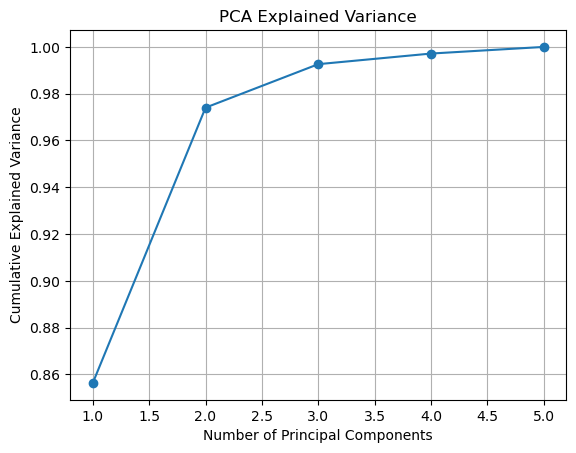

In [59]:
explained = pca.explained_variance_ratio_

cumulative = np.cumsum(explained)

plt.plot(range(1, len(explained)+1), cumulative, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.show()

Keeping 2 principal components would explain most of the variance while keeping the data structure.

Hence, we are using 2 n_components

In [60]:
# Select filter features only
filter_features = df[['green_filter', 'red_filter', 'near_IR_filter', 'IR_filter']]

# Standardize
scaler = StandardScaler()
scaled_filters = scaler.fit_transform(filter_features)

# Apply PCA
pca = PCA(n_components=2)  # Choosing 2 n components because it explains 97% of the variance and data structure 
filter_pca = pca.fit_transform(scaled_filters)

pca_df = pd.DataFrame(filter_pca, columns=['filter_pca1', 'filter_pca2'], index=df.index)
df = pd.concat([df, pca_df], axis=1)

# Drop original values
df = df.drop(columns=['UV_filter','green_filter', 'red_filter', 'near_IR_filter', 'IR_filter'])
df

,alpha,delta,red_shift,class,season_Fall,season_Spring,season_Summer,season_Winter,Constant,filter_pca1,filter_pca2
0,-0.434549,0.425523,0.079541,GALAXY,0,0,0,1,1,0.624645,0.643811
1,-0.339867,0.363396,0.277076,GALAXY,0,0,0,1,1,2.735312,-0.231825
2,-0.367196,0.582708,0.092407,GALAXY,0,0,0,1,1,0.872009,0.723315
3,1.669573,-1.249118,0.486746,GALAXY,1,0,0,0,1,1.831903,0.917094
5,1.692931,-0.180507,1.160485,QSO,1,0,0,0,1,1.659036,0.680450
...,...,...,...,...,...,...,...,...,...,...,...
99995,-1.430056,-1.360663,-0.789185,GALAXY,0,0,0,1,1,2.373935,0.029433
99996,-1.534996,-0.220753,-0.235079,GALAXY,1,0,0,0,1,1.012141,0.389338
99997,0.486658,-0.429370,-0.592986,GALAXY,0,0,0,1,1,-1.522301,0.079061
99998,0.359005,1.146628,-0.166455,GALAXY,0,0,0,1,1,0.266815,0.441498


In [61]:
df = df.drop(columns=['Constant'])

##### <b>Tidying up the dataframe</b>

In [62]:
stellar_class = df['class']

In [63]:
stellar_class

0        GALAXY
1        GALAXY
2        GALAXY
3        GALAXY
5           QSO
          ...  
99995    GALAXY
99996    GALAXY
99997    GALAXY
99998    GALAXY
99999    GALAXY
Name: class, Length: 99989, dtype: object

In [64]:
df = df.drop(["class"], axis=1)
tidied_df = pd.concat([df, stellar_class], axis=1)

In [65]:
df = tidied_df

In [66]:
df

,alpha,delta,red_shift,season_Fall,season_Spring,season_Summer,season_Winter,filter_pca1,filter_pca2,class
0,-0.434549,0.425523,0.079541,0,0,0,1,0.624645,0.643811,GALAXY
1,-0.339867,0.363396,0.277076,0,0,0,1,2.735312,-0.231825,GALAXY
2,-0.367196,0.582708,0.092407,0,0,0,1,0.872009,0.723315,GALAXY
3,1.669573,-1.249118,0.486746,1,0,0,0,1.831903,0.917094,GALAXY
5,1.692931,-0.180507,1.160485,1,0,0,0,1.659036,0.680450,QSO
...,...,...,...,...,...,...,...,...,...,...
99995,-1.430056,-1.360663,-0.789185,0,0,0,1,2.373935,0.029433,GALAXY
99996,-1.534996,-0.220753,-0.235079,1,0,0,0,1.012141,0.389338,GALAXY
99997,0.486658,-0.429370,-0.592986,0,0,0,1,-1.522301,0.079061,GALAXY
99998,0.359005,1.146628,-0.166455,0,0,0,1,0.266815,0.441498,GALAXY


## <b>Data Analysis</b> ##

### <b>Univariate analysis</b> ###

- Peforming Univariate analysis on new features

##### <b>Discrete Data</b> #####

#### <b>Numerical Data</b> ####

In [67]:
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns
print(numerical_cols)

Index(['alpha', 'delta', 'red_shift', 'season_Fall', 'season_Spring', 'season_Summer', 'season_Winter', 'filter_pca1', 'filter_pca2'], dtype='object')


##### <b>filter PCA 1</b> #####

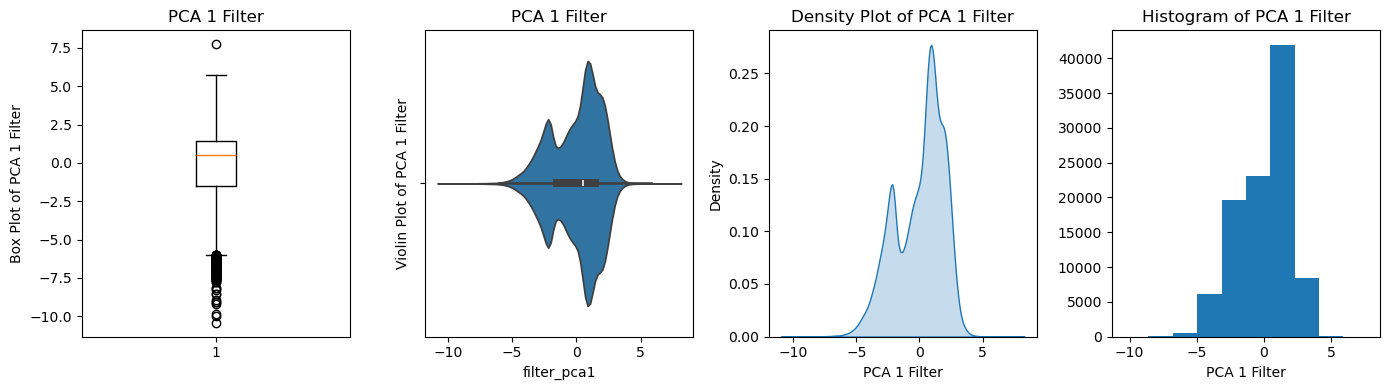

In [68]:
# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(14, 4))  # 1 row, 4 columns

# Box plot on the first subplot
axs[0].boxplot(df['filter_pca1'])
axs[0].set_title('PCA 1 Filter')
axs[0].set_ylabel('Box Plot of PCA 1 Filter')

# Violin plot on the second subplot, passed explicitly to ax
sns.violinplot(x='filter_pca1', data=df,fill=True, ax=axs[1])
axs[1].set_title('PCA 1 Filter')
axs[1].set_ylabel('Violin Plot of PCA 1 Filter')

sns.kdeplot(data=df['filter_pca1'], fill=True, ax=axs[2])
axs[2].set_title('Density Plot of PCA 1 Filter')
axs[2].set_xlabel('PCA 1 Filter')
axs[2].set_ylabel('Density')

axs[3].hist(df['filter_pca1'])
axs[3].set_title('Histogram of PCA 1 Filter')
axs[3].set_xlabel('PCA 1 Filter')

plt.tight_layout()
plt.show()

##### <b>filter PCA 2</b> #####

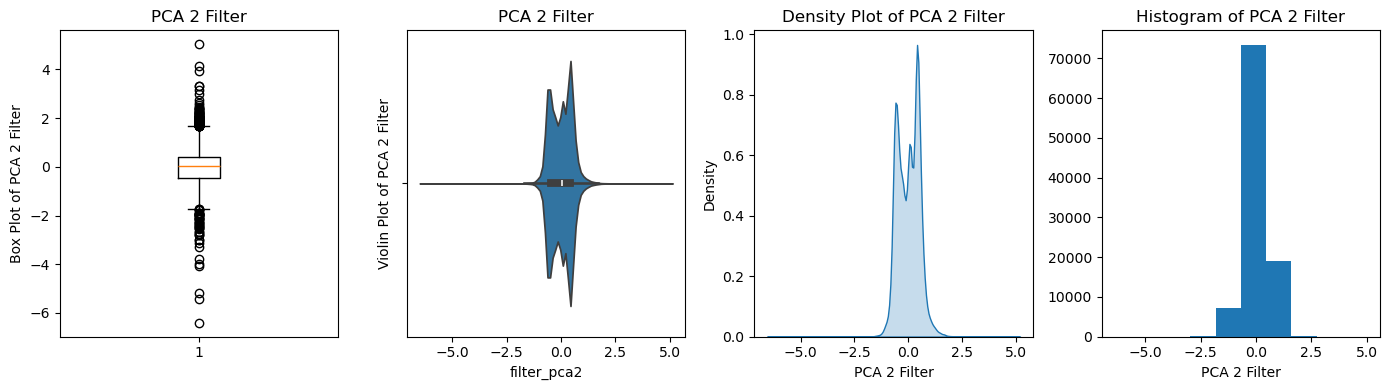

In [69]:
# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(14, 4))  # 1 row, 4 columns

# Box plot on the first subplot
axs[0].boxplot(df['filter_pca2'])
axs[0].set_title('PCA 2 Filter')
axs[0].set_ylabel('Box Plot of PCA 2 Filter')

# Violin plot on the second subplot, passed explicitly to ax
sns.violinplot(x='filter_pca2', data=df,fill=True, ax=axs[1])
axs[1].set_title('PCA 2 Filter')
axs[1].set_ylabel('Violin Plot of PCA 2 Filter')

sns.kdeplot(data=df['filter_pca2'], fill=True, ax=axs[2])
axs[2].set_title('Density Plot of PCA 2 Filter')
axs[2].set_xlabel('PCA 2 Filter')
axs[2].set_ylabel('Density')

axs[3].hist(df['filter_pca2'])
axs[3].set_title('Histogram of PCA 2 Filter')
axs[3].set_xlabel('PCA 2 Filter')

plt.tight_layout()
plt.show()

#### <b>Multivariate analysis</b> ####

In [70]:
df.columns  

Index(['alpha', 'delta', 'red_shift', 'season_Fall', 'season_Spring', 'season_Summer', 'season_Winter', 'filter_pca1', 'filter_pca2', 'class'], dtype='object')

In [71]:
df_sample = df.sample(7000, random_state=2)

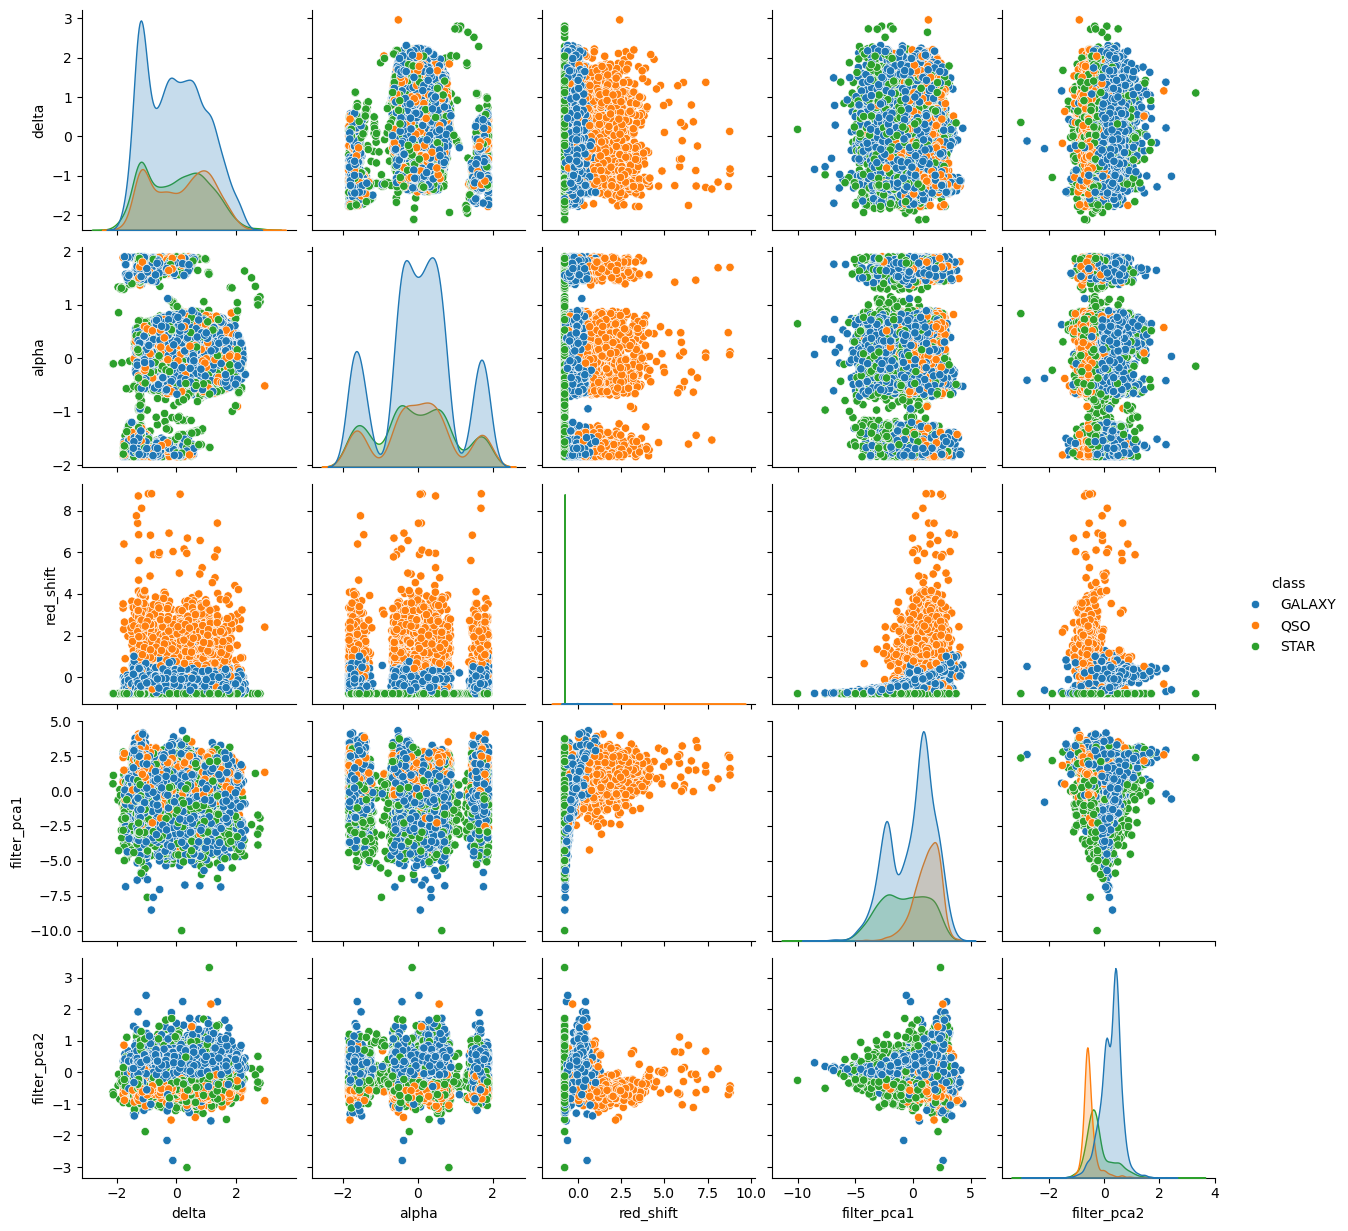

In [121]:
sns.pairplot(df_sample[['delta', 'alpha', 'red_shift', 'filter_pca1', 'filter_pca2', 'class']], hue='class')

"GALAXY" has 

In [132]:
df

,alpha,delta,red_shift,season_Fall,season_Spring,season_Summer,season_Winter,filter_pca1,filter_pca2,class
0,-0.434549,0.425523,0.079541,0,0,0,1,0.624645,0.643811,GALAXY
1,-0.339867,0.363396,0.277076,0,0,0,1,2.735312,-0.231825,GALAXY
2,-0.367196,0.582708,0.092407,0,0,0,1,0.872009,0.723315,GALAXY
3,1.669573,-1.249118,0.486746,1,0,0,0,1.831903,0.917094,GALAXY
5,1.692931,-0.180507,1.160485,1,0,0,0,1.659036,0.680450,QSO
...,...,...,...,...,...,...,...,...,...,...
99995,-1.430056,-1.360663,-0.789185,0,0,0,1,2.373935,0.029433,GALAXY
99996,-1.534996,-0.220753,-0.235079,1,0,0,0,1.012141,0.389338,GALAXY
99997,0.486658,-0.429370,-0.592986,0,0,0,1,-1.522301,0.079061,GALAXY
99998,0.359005,1.146628,-0.166455,0,0,0,1,0.266815,0.441498,GALAXY


C:\Users\alysa\AppData\Local\Temp\ipykernel_26264\1337962909.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="class", y="red_shift", palette="hls", legend=False, ax=axs[0,0])
C:\Users\alysa\AppData\Local\Temp\ipykernel_26264\1337962909.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="class", y="delta", palette="hls", legend=False, ax=axs[0,1])
C:\Users\alysa\AppData\Local\Temp\ipykernel_26264\1337962909.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="class", y="alpha", palette="hls", legend=Fals

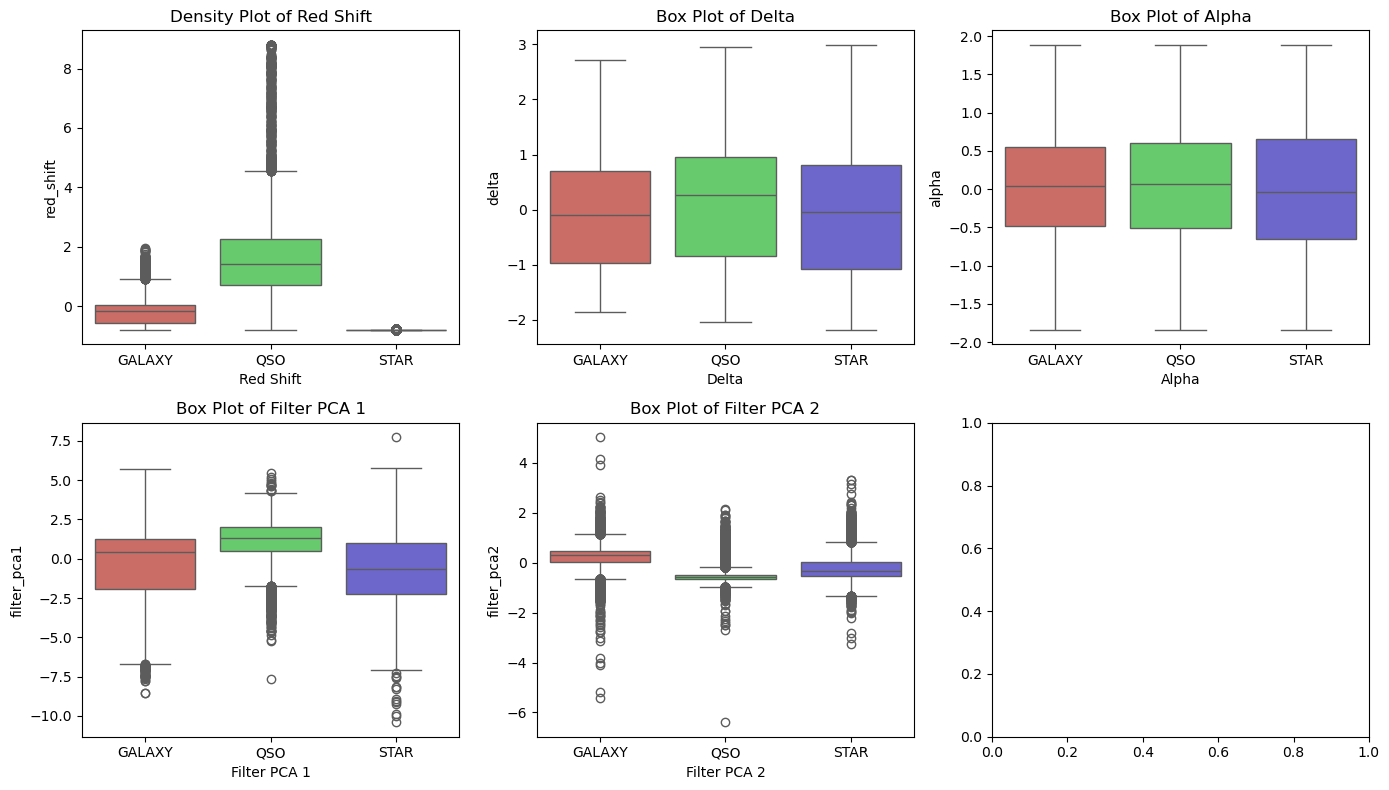

In [136]:
fig, axs = plt.subplots(2, 3, figsize=(14, 8))  # 1 row, 4 columns
sns.boxplot(data=df, x="class", y="red_shift", palette="hls", legend=False, ax=axs[0,0])
axs[0,0].set_title('Density Plot of Red Shift')
axs[0,0].set_xlabel('Red Shift')

sns.boxplot(data=df, x="class", y="delta", palette="hls", legend=False, ax=axs[0,1])
axs[0,1].set_title('Box Plot of Delta')
axs[0,1].set_xlabel('Delta')

sns.boxplot(data=df, x="class", y="alpha", palette="hls", legend=False, ax=axs[0,2])
axs[0,2].set_title('Box Plot of Alpha')
axs[0,2].set_xlabel('Alpha')

sns.boxplot(data=df, x="class", y="filter_pca1", palette="hls", legend=False, ax=axs[1,0])
axs[1,0].set_title('Box Plot of Filter PCA 1')
axs[1,0].set_xlabel('Filter PCA 1')

sns.boxplot(data=df, x="class", y="filter_pca2", palette="hls", legend=False, ax=axs[1,1])
axs[1,1].set_title('Box Plot of Filter PCA 2')
axs[1,1].set_xlabel('Filter PCA 2')

plt.tight_layout()
plt.show()

In [ ]:

numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='class', y=col, data=df)
    plt.title(f'{col} by Stellar Class')
    plt.show()

##### <b>Heatmap</b>

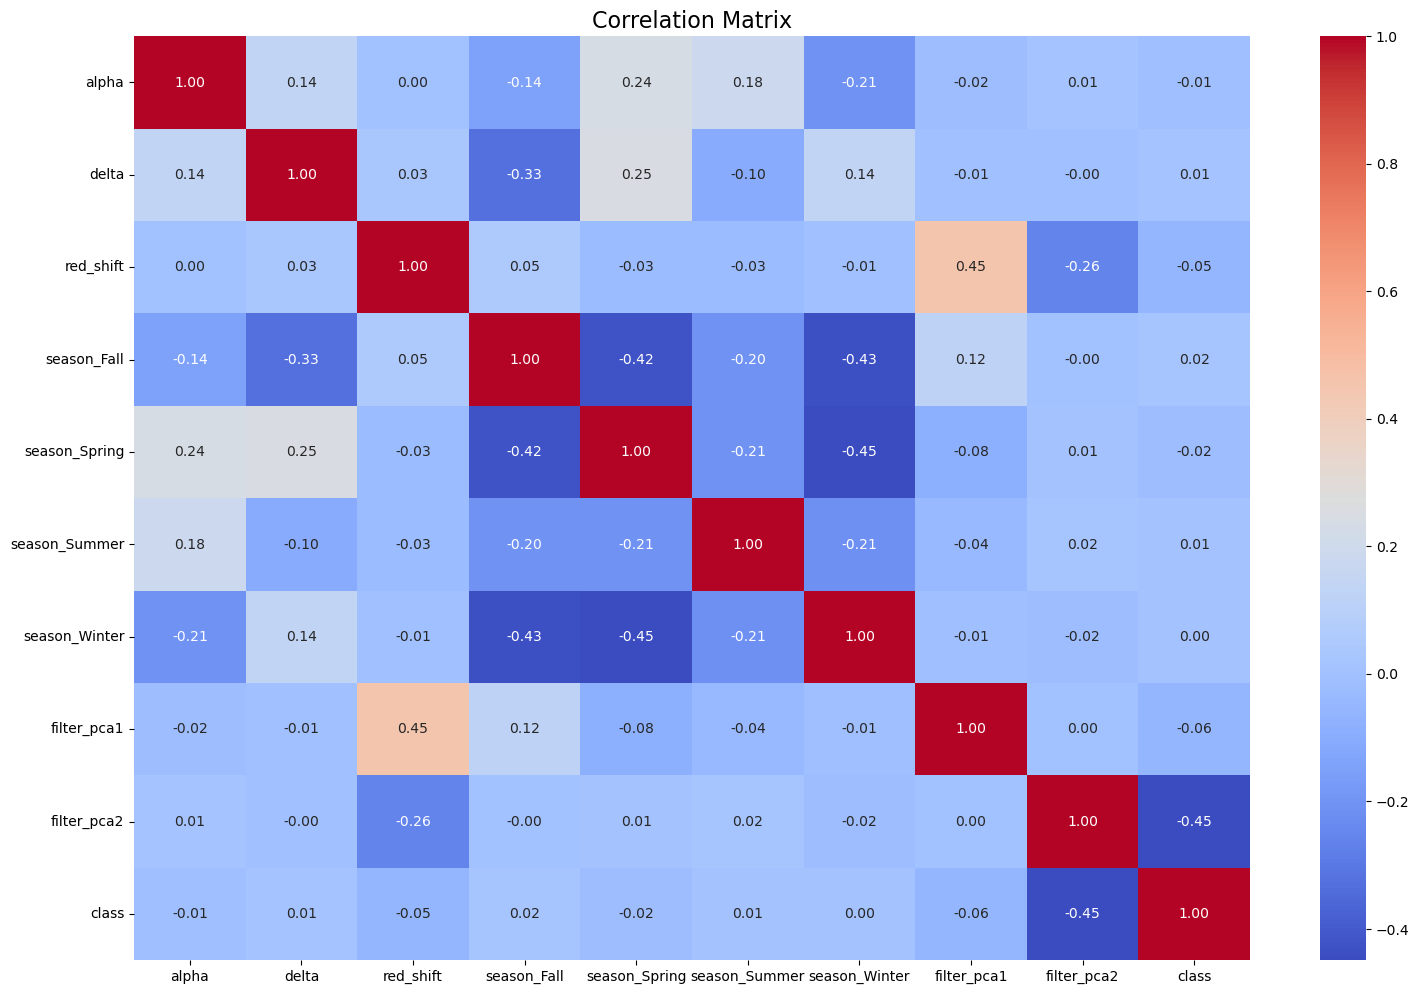

In [ ]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder

fig = plt.figure(figsize=(18,12))
label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])

numCorr = df.select_dtypes(exclude="object").corr()

sns.heatmap(numCorr, cbar=True, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Matrix", fontsize=16)
plt.show()

- There are no jarring correlation between the variables

## <b>Model Training</b> ##

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
# Import
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier, LogisticRegression, Perceptron, RidgeClassifier, RidgeClassifierCV, PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, log_loss, average_precision_score, cohen_kappa_score, matthews_corrcoef
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, cross_val_predict

### <b>Sampling Data</b> ###
- Makes models faster to train
- Used to derive base conculsions from dataset without spending too much time on training
- Optimal models and hyperparameters will be used on the final dataset

In [75]:
df

,alpha,delta,red_shift,season_Fall,season_Spring,season_Summer,season_Winter,filter_pca1,filter_pca2,class
0,-0.434549,0.425523,0.079541,0,0,0,1,0.624645,0.643811,GALAXY
1,-0.339867,0.363396,0.277076,0,0,0,1,2.735312,-0.231825,GALAXY
2,-0.367196,0.582708,0.092407,0,0,0,1,0.872009,0.723315,GALAXY
3,1.669573,-1.249118,0.486746,1,0,0,0,1.831903,0.917094,GALAXY
5,1.692931,-0.180507,1.160485,1,0,0,0,1.659036,0.680450,QSO
...,...,...,...,...,...,...,...,...,...,...
99995,-1.430056,-1.360663,-0.789185,0,0,0,1,2.373935,0.029433,GALAXY
99996,-1.534996,-0.220753,-0.235079,1,0,0,0,1.012141,0.389338,GALAXY
99997,0.486658,-0.429370,-0.592986,0,0,0,1,-1.522301,0.079061,GALAXY
99998,0.359005,1.146628,-0.166455,0,0,0,1,0.266815,0.441498,GALAXY


In [76]:
df_sample = df.sample(7000, random_state=2)
df_sample

,alpha,delta,red_shift,season_Fall,season_Spring,season_Summer,season_Winter,filter_pca1,filter_pca2,class
79466,-1.699391,-1.265283,0.073462,1,0,0,0,1.843098,0.689189,GALAXY
79458,-0.240383,0.594439,-0.043353,0,0,0,1,0.922377,0.343401,GALAXY
23303,-0.523884,0.748763,0.474769,1,0,0,0,1.319523,-0.662280,QSO
97516,-0.274993,0.009672,-0.418252,0,0,0,1,2.622975,-0.564190,GALAXY
95291,0.072586,0.627973,-0.630827,0,0,0,1,-2.641664,0.013053,GALAXY
...,...,...,...,...,...,...,...,...,...,...
16054,0.594609,-0.495671,-0.072382,0,0,1,0,0.219945,0.233357,GALAXY
69418,0.320221,1.664464,-0.499117,0,1,0,0,-1.949802,0.202707,GALAXY
78053,1.553239,-0.699860,0.056680,1,0,0,0,1.394258,0.556496,GALAXY
93053,0.470601,0.999586,-0.115568,0,1,0,0,0.163307,0.500722,GALAXY


In [77]:
# Features and target
X = df_sample.drop(["class"], axis=1).to_numpy()
y = df_sample["class"].to_numpy()

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [78]:
X_train.shape

(5600, 9)

In [79]:
X_test.shape

(1400, 9)

### <b>Feature Importance</b> ###

In [80]:
display(df_sample)

,alpha,delta,red_shift,season_Fall,season_Spring,season_Summer,season_Winter,filter_pca1,filter_pca2,class
79466,-1.699391,-1.265283,0.073462,1,0,0,0,1.843098,0.689189,GALAXY
79458,-0.240383,0.594439,-0.043353,0,0,0,1,0.922377,0.343401,GALAXY
23303,-0.523884,0.748763,0.474769,1,0,0,0,1.319523,-0.662280,QSO
97516,-0.274993,0.009672,-0.418252,0,0,0,1,2.622975,-0.564190,GALAXY
95291,0.072586,0.627973,-0.630827,0,0,0,1,-2.641664,0.013053,GALAXY
...,...,...,...,...,...,...,...,...,...,...
16054,0.594609,-0.495671,-0.072382,0,0,1,0,0.219945,0.233357,GALAXY
69418,0.320221,1.664464,-0.499117,0,1,0,0,-1.949802,0.202707,GALAXY
78053,1.553239,-0.699860,0.056680,1,0,0,0,1.394258,0.556496,GALAXY
93053,0.470601,0.999586,-0.115568,0,1,0,0,0.163307,0.500722,GALAXY


In [81]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

model = RandomForestClassifier()
model.fit(X_train, y_train)

importances = model.feature_importances_
features = df.drop(["class"], axis=1).columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

display(importance_df)

,Feature,Importance
2,red_shift,0.612400
8,filter_pca2,0.258190
7,filter_pca1,0.072756
0,alpha,0.025973
1,delta,0.024182
6,season_Winter,0.002113
4,season_Spring,0.001608
3,season_Fall,0.001529
5,season_Summer,0.001250


C:\Users\alysa\AppData\Local\Temp\ipykernel_26264\1899096469.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


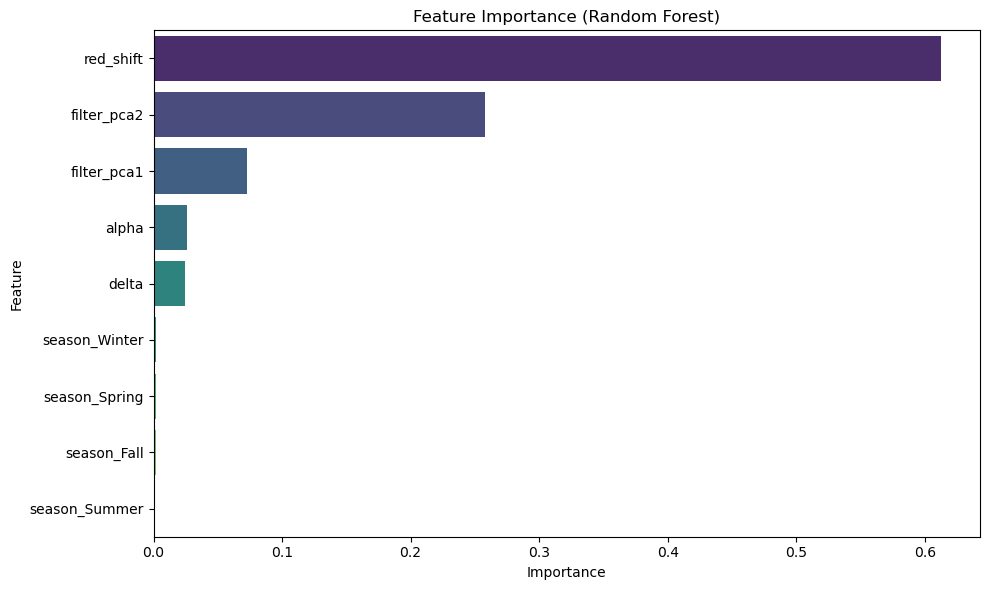

In [82]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance', y='Feature',
    data=importance_df.sort_values(by='Importance', ascending=False),
    palette='viridis'
)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [83]:
df.drop(["season_Spring", "season_Summer", "season_Fall", "season_Winter"], axis=1)

,alpha,delta,red_shift,filter_pca1,filter_pca2,class
0,-0.434549,0.425523,0.079541,0.624645,0.643811,GALAXY
1,-0.339867,0.363396,0.277076,2.735312,-0.231825,GALAXY
2,-0.367196,0.582708,0.092407,0.872009,0.723315,GALAXY
3,1.669573,-1.249118,0.486746,1.831903,0.917094,GALAXY
5,1.692931,-0.180507,1.160485,1.659036,0.680450,QSO
...,...,...,...,...,...,...
99995,-1.430056,-1.360663,-0.789185,2.373935,0.029433,GALAXY
99996,-1.534996,-0.220753,-0.235079,1.012141,0.389338,GALAXY
99997,0.486658,-0.429370,-0.592986,-1.522301,0.079061,GALAXY
99998,0.359005,1.146628,-0.166455,0.266815,0.441498,GALAXY


### <b>Modelling</b> ###

1. Training the baseline model - Logistic Regression model
2. Traning all models

In [84]:
from sklearn.linear_model import SGDClassifier, LogisticRegression, Perceptron, RidgeClassifier, RidgeClassifierCV, PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, cross_val_predict

#### <b>Baseline Model</b> ####

In [85]:
# baseline model
lr_model = LogisticRegression(max_iter = 200)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [86]:
# Predictions
y_pred = lr_model.predict(X_test)

# use y_test (groundtruth) to evaluate accuracy score with prediction
accu = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="macro") # Macro as we are trying to get the average between 3 classes

logr_df = pd.DataFrame()
logr_df["Model"] = ["Logistic Regression"]
logr_df["Accuracy"] = [accu]
logr_df["F1 Score"] = [f1]
display(logr_df)

,Model,Accuracy,F1 Score
0,Logistic Regression,0.943571,0.935043


#### <b>Models</b> ####

In [87]:
# Model Dictionary
models = {
    "RandomForestClassifier": {"model": RandomForestClassifier()},
    "AdaBoostClassifier": {"model": AdaBoostClassifier()},
    "GradientBoostingClassifier": {"model": GradientBoostingClassifier()},
    "ExtraTreesClassifier": {"model": ExtraTreesClassifier()},
    "BaggingClassifier": {"model": BaggingClassifier()},
    "DecisionTreeClassifier": {"model": DecisionTreeClassifier()},
    "KNeighborsClassifier": {"model": KNeighborsClassifier()},
    "GaussianNB": {"model": GaussianNB()},
    "SGDClassifier": {"model": SGDClassifier()},
    "SVC": {"model": SVC()},
    "LinearSVC": {"model": LinearSVC()},
    "LogisticRegression": {"model": LogisticRegression()},
    "Perceptron": {"model": Perceptron()},
    "RidgeClassifier": {"model": RidgeClassifier()},
    "RidgeClassifierCV": {"model": RidgeClassifierCV()},
    "PassiveAggressiveClassifier": {"model": PassiveAggressiveClassifier()},
    "BernoulliNB": {"model": BernoulliNB()},
    "ExtraTreeClassifier": {"model": ExtraTreeClassifier()}
}

In [88]:
def evaluate_and_train_models(models, X_train, y_train, average, cv=3):
    results = []
    
    for model_name, model_info in models.items():
        model = model_info["model"]
        
        # Cross-validation
        scores = cross_val_score(model, X_train, y_train, cv=cv)
        mean_score = scores.mean()
        
        # Cross-validation predictions and training
        y_train_pred = cross_val_predict(model, X_train, y_train, cv=cv)
        model.fit(X_train, y_train)
        
        # Accuracy calculation
        accuracy = accuracy_score(y_train, y_train_pred)

        # F1 score calculation
        f1 = f1_score(y_train, y_train_pred, average=average)
        
        # Append results to the list
        results.append({
            "Classifiers": model_name,
            "Crossval Mean Scores": mean_score,
            "Accuracy": accuracy,
            "F1 Score": f1

        })
        
    result_df = pd.DataFrame(results)
    return result_df

In [89]:
train_result_df = evaluate_and_train_models(models, X_train, y_train, "macro")
train_result_df = train_result_df.sort_values(by=['Crossval Mean Scores','Accuracy', 'F1 Score'], ascending=False)
train_result_df

,Classifiers,Crossval Mean Scores,Accuracy,F1 Score
0,RandomForestClassifier,0.971428,0.969821,0.965982
2,GradientBoostingClassifier,0.970714,0.970000,0.966123
4,BaggingClassifier,0.969285,0.970893,0.966772
3,ExtraTreesClassifier,0.965535,0.965714,0.961462
5,DecisionTreeClassifier,0.959285,0.958750,0.953840
11,LogisticRegression,0.940536,0.940536,0.933626
7,GaussianNB,0.940535,0.940536,0.934059
1,AdaBoostClassifier,0.928751,0.928750,0.921483
9,SVC,0.920178,0.920179,0.912839
10,LinearSVC,0.918035,0.918036,0.910247


Bernoulli Naive Bayes accuracy score and f1-score is <b>significantly</b> lower than the other models, this is because Bernouli NB works best on binary features, with numerical features like on our 

In [90]:
train_result_df = evaluate_and_train_models(models, X_test, y_test, "macro")
train_result_df = train_result_df.sort_values(by=['Crossval Mean Scores','Accuracy', 'F1 Score'], ascending=False)
train_result_df

,Classifiers,Crossval Mean Scores,Accuracy,F1 Score
2,GradientBoostingClassifier,0.961427,0.961429,0.955175
0,RandomForestClassifier,0.958564,0.959286,0.952372
4,BaggingClassifier,0.954279,0.953571,0.945625
3,ExtraTreesClassifier,0.950708,0.953571,0.946301
1,AdaBoostClassifier,0.940708,0.940714,0.930272
7,GaussianNB,0.939998,0.940000,0.931563
5,DecisionTreeClassifier,0.937862,0.938571,0.929754
11,LogisticRegression,0.919994,0.920000,0.909568
10,LinearSVC,0.909289,0.909286,0.898028
9,SVC,0.884979,0.885000,0.869583


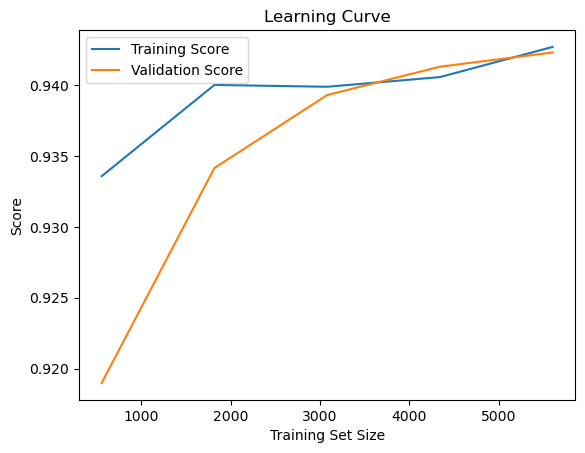

In [91]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, val_scores = learning_curve(lr_model, X, y, cv=5)

train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label="Training Score")
plt.plot(train_sizes, val_mean, label="Validation Score")
plt.xlabel("Training Set Size")
plt.ylabel("Score")
plt.legend()
plt.title("Learning Curve")
plt.show()


In [92]:
gb_model = GradientBoostingClassifier(
    n_estimators=200,
    random_state=12345,
)

gb_model.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=200, random_state=12345)

In [94]:
# Predictions
y_pred = gb_model_tuned.predict(X_test)

# use y_test (groundtruth) to evaluate accuracy score with prediction
accu = accuracy_score(y_test, y_pred)
print("Accuracy:", accu)
f1 = f1_score(y_test, y_pred, average='macro')
print("F1-score:", f1)

Accuracy: 0.9571428571428572
F1-score: 0.9502806734800542


In [95]:
# Predictions
y_pred = gb_model.predict(X_test)

# use y_test (groundtruth) to evaluate accuracy score with prediction
accu = accuracy_score(y_test, y_pred)
print("Accuracy:", accu)
f1 = f1_score(y_test, y_pred, average='macro')
print("F1-score:", f1)

Accuracy: 0.9664285714285714
F1-score: 0.9611126432370142


Classification Report:


,precision,recall,f1-score,support
GALAXY,0.970414,0.973872,0.972140,842.000000
QSO,0.923372,0.906015,0.914611,266.000000
STAR,0.993197,1.000000,0.996587,292.000000
accuracy,0.966429,0.966429,0.966429,0.966429
macro avg,0.962328,0.959962,0.961113,1400.000000
weighted avg,0.966228,0.966429,0.966308,1400.000000



Confusion Matrix:


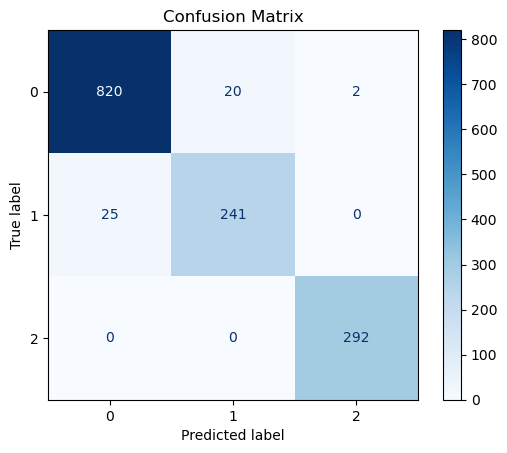

In [96]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

classification_report_dict = classification_report(y_test, y_pred, output_dict=True)
cr_output_dict = pd.DataFrame(classification_report_dict).transpose()

print("Classification Report:")
display(cr_output_dict)

print("\nConfusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

### <b>Feature Selection</b> ###

### <b>Hyperparameter Tuning</b> ###

In [97]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

model = gb_model

param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

random_search = RandomizedSearchCV(model, param_dist, n_iter=10, cv=5, scoring='f1_macro', random_state=42)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

best_model = random_search.best_estimator_

Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 268}
Best Score: 0.9690652636367021


In [98]:
classifiers = {
    'RandomForest': (RandomForestClassifier(), {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 50, 100],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 5],
        'max_features': [1, 3, 6, 9]
    }),

    'ExtraTrees': (ExtraTreesClassifier(), {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 50, 100],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 5],
        'max_features': [1, 3, 6, 9]
    }),

    'Bagging': (BaggingClassifier(), {
        'n_estimators': [100, 200, 300],
        'max_samples': [1, 2, 5, 10],
        'max_features': [1, 3, 6, 9]
    }),

    'GradientBoosting': (GradientBoostingClassifier(), {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 50, 100],
        'learning_rate': [0.1, 0.5, 0.75, 1.0],
        'subsample': [0.01, 0.1, 0.3, 0.75, 1.0],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 5],
        'max_features': [1, 3, 6, 9]
    }),

    'AdaBoost': (AdaBoostClassifier(), {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.1, 0.5, 0.75, 1.0]
    })
}


In [99]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

best_results = {}

for name, (model, param_grid) in classifiers.items():
    print(f"Running search for: {name}")
    
    # Choose one:
    # 1. Grid Search
    search = GridSearchCV(model, param_grid, scoring='accuracy', cv=3, n_jobs=-1)
    
    # 2. Random Search (Uncomment to use instead of Grid Search)
    # search = RandomizedSearchCV(model, param_distributions=param_grid, scoring='accuracy', cv=3, n_iter=20, n_jobs=-1, random_state=42)
    
    search.fit(X_train, y_train)
    
    best_model = search.best_estimator_
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    best_results[name] = {
        'best_params': search.best_params_,
        'best_cv_score': search.best_score_,
        'test_accuracy': acc
    }


Running search for: RandomForest
Running search for: ExtraTrees
Running search for: Bagging
Running search for: GradientBoosting
Running search for: AdaBoost


In [100]:
print(best_results[name].keys())

dict_keys(['best_params', 'best_cv_score', 'test_accuracy'])


In [104]:
print(best_results[name].get("best_params"))

{'learning_rate': 0.1, 'n_estimators': 200}


In [105]:
data = []
for name, result in best_results.items():
    data.append({
        "model": name,
        "hyperparameters": result.get("best_params"),
        "best_cv_score": result.get("best_cv_score"),
        "test_accuracy": result.get("test_accuracy")
    })

# Convert to DataFrame
hyperparameters_df = pd.DataFrame(data)

display(hyperparameters_df)


,model,hyperparameters,best_cv_score,test_accuracy
0,RandomForest,"{'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}",0.974821,0.962857
1,ExtraTrees,"{'max_depth': 50, 'max_features': 9, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}",0.971785,0.958571
2,Bagging,"{'max_features': 9, 'max_samples': 10, 'n_estimators': 300}",0.930536,0.937143
3,GradientBoosting,"{'learning_rate': 0.1, 'max_depth': 50, 'max_features': 6, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 100, 'subsample': 0.75}",0.975357,0.965000
4,AdaBoost,"{'learning_rate': 0.1, 'n_estimators': 200}",0.944820,0.946429


In [137]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model_tuned = GradientBoostingClassifier(
    learning_rate = 0.1,
    max_depth = 8,
    max_features = 6,
    min_samples_leaf = 5,
    min_samples_split = 10,
    n_estimators = 100,
    subsample = 0.75
)

gb_model_tuned.fit(X_train, y_train)

c:\Users\alysa\anaconda3\envs\mldp\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(max_depth=8, max_features=6, min_samples_leaf=5,
                           min_samples_split=10, subsample=0.75)

#### <b>Model Deployment</b> ####

- Our model is trained on cleaned data (data that has been optimised through PCA and feature scaling)
- Feature Scaling and PCA needs to be applied to the user's raw input before loading those input's into the model
- Therefore, I am utilizing a Pipeline to acheive this

In [146]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [113]:
df

,alpha,delta,red_shift,season_Fall,season_Spring,season_Summer,season_Winter,filter_pca1,filter_pca2,class
0,-0.434549,0.425523,0.079541,0,0,0,1,0.624645,0.643811,GALAXY
1,-0.339867,0.363396,0.277076,0,0,0,1,2.735312,-0.231825,GALAXY
2,-0.367196,0.582708,0.092407,0,0,0,1,0.872009,0.723315,GALAXY
3,1.669573,-1.249118,0.486746,1,0,0,0,1.831903,0.917094,GALAXY
5,1.692931,-0.180507,1.160485,1,0,0,0,1.659036,0.680450,QSO
...,...,...,...,...,...,...,...,...,...,...
99995,-1.430056,-1.360663,-0.789185,0,0,0,1,2.373935,0.029433,GALAXY
99996,-1.534996,-0.220753,-0.235079,1,0,0,0,1.012141,0.389338,GALAXY
99997,0.486658,-0.429370,-0.592986,0,0,0,1,-1.522301,0.079061,GALAXY
99998,0.359005,1.146628,-0.166455,0,0,0,1,0.266815,0.441498,GALAXY


In [161]:
# Define columns
pca_cols = ["UV_filter", "red_filter", "green_filter", "IR_filter", "near_IR_filter"]
std_cols = ["delta", "alpha","red_shift"]

# Preprocessing: different steps per column group
preprocessor = ColumnTransformer(transformers=[
    ('pca', Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=1))
    ]), pca_cols),
    ('standard', StandardScaler(), std_cols)
])

# Full Pipeline
final_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', RandomForestClassifier())
])

In [118]:
X_train

,alpha,delta,red_shift,season_Fall,season_Spring,season_Summer,season_Winter,filter_pca1,filter_pca2
0,-1.735372,-0.177442,0.097016,1.0,0.0,0.0,0.0,2.444017,-0.714451
1,1.829511,-0.844079,1.123605,1.0,0.0,0.0,0.0,2.341781,-0.377089
2,-0.349534,1.698466,-0.102196,0.0,0.0,0.0,1.0,0.846622,0.394217
3,-1.490150,-0.930914,0.159117,1.0,0.0,0.0,0.0,1.926366,0.260181
4,0.289197,1.780926,0.446632,0.0,1.0,0.0,0.0,0.644264,-0.434678
...,...,...,...,...,...,...,...,...,...
5595,0.020680,-0.895036,-0.014300,0.0,0.0,0.0,1.0,0.477223,0.604694
5596,0.417071,-0.475660,-0.788520,0.0,1.0,0.0,0.0,-2.090937,-0.464799
5597,1.868762,0.449392,0.848240,1.0,0.0,0.0,0.0,-0.686854,-0.439772
5598,-0.512012,-0.094027,0.150436,0.0,0.0,0.0,1.0,0.843255,1.043056


In [186]:
original_df = pd.read_csv(DIR)

C:\Users\alysa\AppData\Local\Temp\ipykernel_26264\1108805118.py:1: DtypeWarning: Columns (1,8) have mixed types. Specify dtype option on import or set low_memory=False.
  original_df = pd.read_csv(DIR)


In [153]:
original_df.columns

Index(['object_ID', 'alpha', 'delta', 'UV_filter', 'green_filter', 'red_filter', 'near_IR_filter', 'IR_filter', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'red_shift', 'plate_ID', 'MJD', 'fiber_ID', 'class'], dtype='object')

In [187]:
original_df['alpha'] = pd.to_numeric(original_df['alpha'], errors='coerce')
# drop rows with failed conversions
original_df = original_df.dropna(subset=['alpha'])
# drop missing rows
original_df = original_df.dropna()
original_df = original_df[~(original_df == -9999.000000).any(axis=1)]
original_df = original_df.drop(['object_ID', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'plate_ID', 'MJD', 'fiber_ID'], axis =1)

In [188]:
original_df_sample = original_df.sample(7000, random_state=42)

In [190]:
# Features and target
X_original = original_df_sample.drop(['class'], axis =1)
y_original = original_df_sample["class"]

# Train/test split
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X_original, y_original, test_size=0.2, random_state=3)
final_pipeline.fit(X_train_original, y_train_original)

y_pred_original = final_pipeline.predict(X_test_original)

print("Accuracy:", accuracy_score(y_test_original, y_pred_original))
print("Classification Report:\n", classification_report(y_test_original, y_pred_original))

Accuracy: 0.9585714285714285
Classification Report:
               precision    recall  f1-score   support

      GALAXY       0.95      0.98      0.97       843
         QSO       0.94      0.85      0.89       252
        STAR       0.99      0.99      0.99       305

    accuracy                           0.96      1400
   macro avg       0.96      0.94      0.95      1400
weighted avg       0.96      0.96      0.96      1400



In [168]:
n_samples = 20

np.random.seed(42)

test_data = pd.DataFrame({
    "UV_filter": np.random.uniform(0, 30, n_samples),
    "red_filter": np.random.uniform(0, 30, n_samples),
    "green_filter": np.random.uniform(0, 30, n_samples),
    "IR_filter": np.random.uniform(0, 30, n_samples),
    "near_IR_filter": np.random.uniform(0, 30, n_samples),
    "delta": np.random.normal(-10, 80, n_samples),
    "alpha": np.random.normal(0, 7, n_samples),
    "red_shift": np.random.normal(0, 7, n_samples)
})

In [169]:
pred = final_pipeline.predict(test_data)
print(pred)

['STAR' 'STAR' 'QSO' 'QSO' 'QSO' 'STAR' 'QSO' 'STAR' 'QSO' 'QSO' 'STAR'
 'STAR' 'QSO' 'STAR' 'STAR' 'GALAXY' 'STAR' 'QSO' 'STAR' 'QSO']


In [189]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99989 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   alpha           99989 non-null  float64
 1   delta           99989 non-null  float64
 2   UV_filter       99989 non-null  float64
 3   green_filter    99989 non-null  float64
 4   red_filter      99989 non-null  float64
 5   near_IR_filter  99989 non-null  float64
 6   IR_filter       99989 non-null  float64
 7   red_shift       99989 non-null  float64
 8   class           99989 non-null  object 
dtypes: float64(8), object(1)
memory usage: 7.6+ MB


In [191]:
import joblib
joblib.dump(final_pipeline, 'model.pkl')

['model.pkl']